In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Palatino",
    "font.size": 16
})

In [2]:
directory = 'log'
files = os.listdir(directory)


In [3]:
datas = []
for file in files:
    data = pd.read_csv(os.path.join(directory,file),header=None,names=['t','U','I'])
    data.iloc[len(data.I)-1,2] = data.iloc[len(data.I)-2,2]
    datas.append(data)


/var/folders/yl/yry63jv13m75yc_y50wzm1kr0000gn/T/ipykernel_3798/2164427734.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(10, 10))


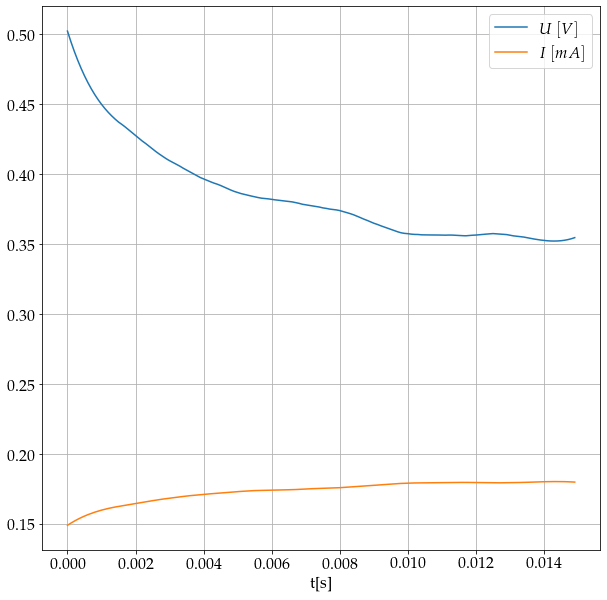

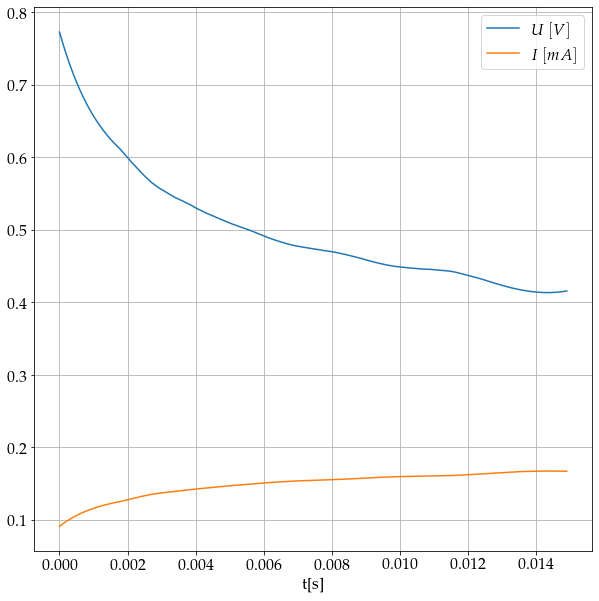

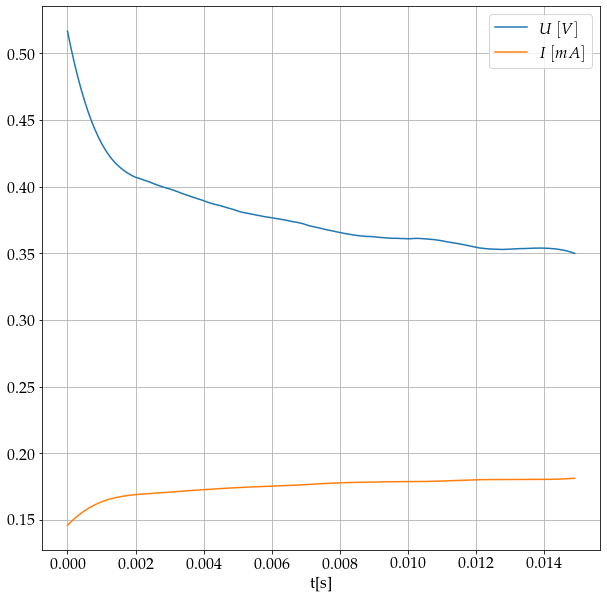

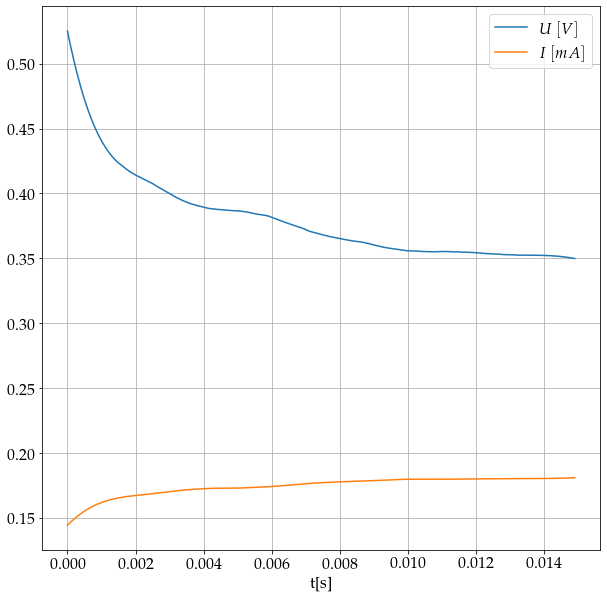

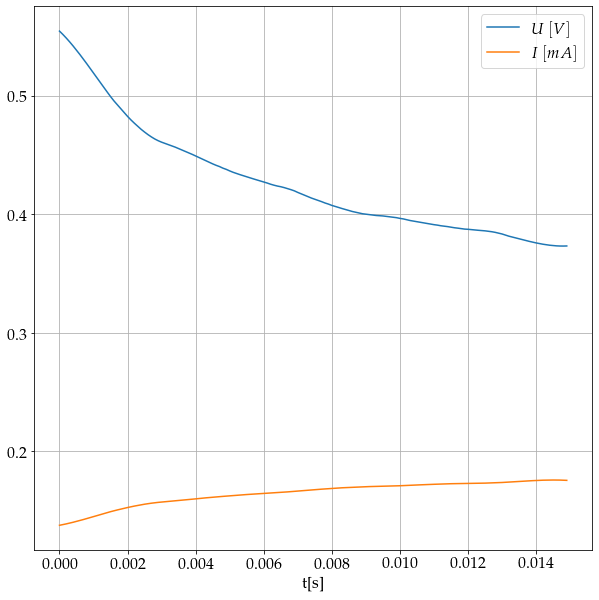

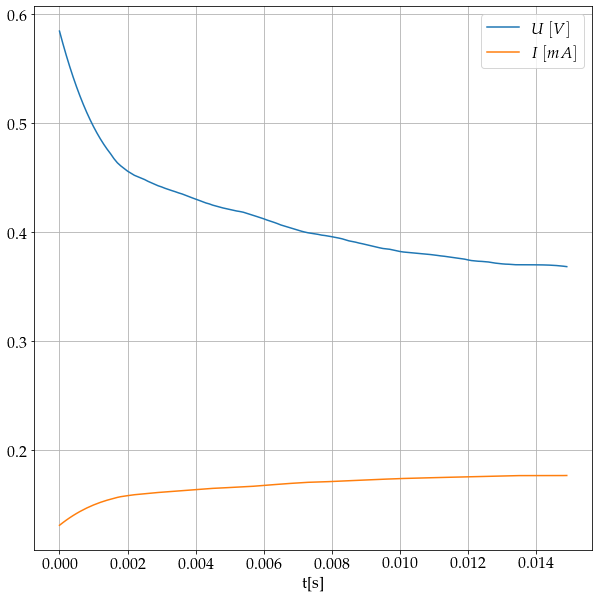

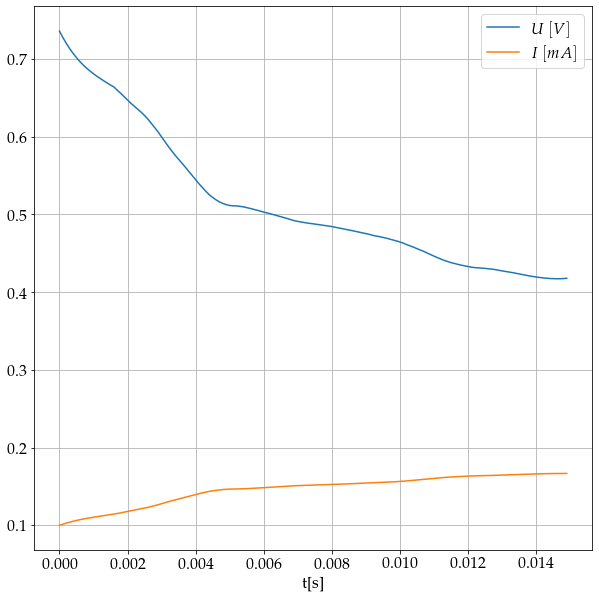

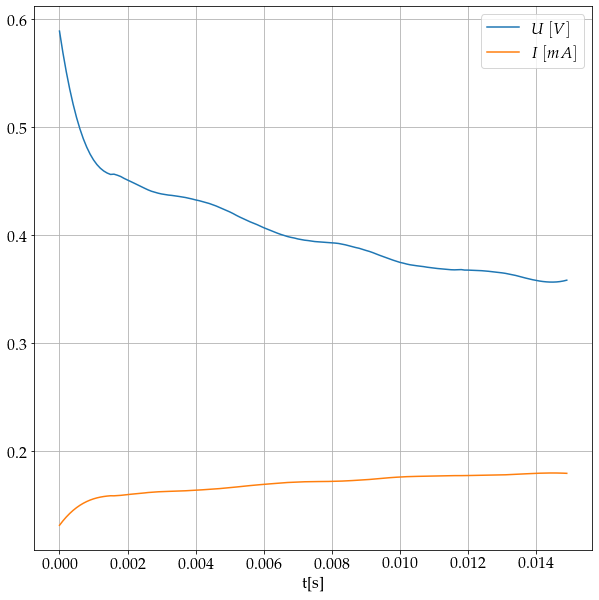

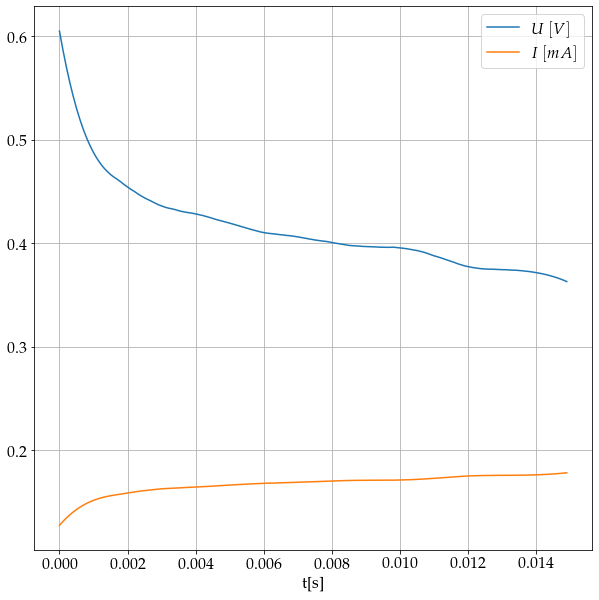

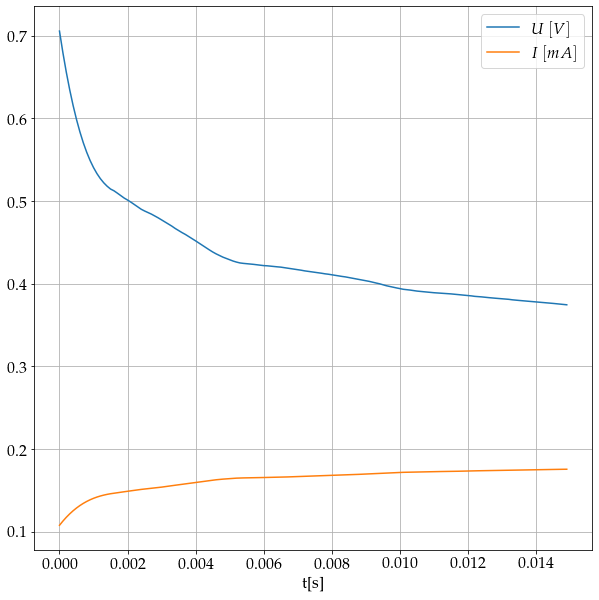

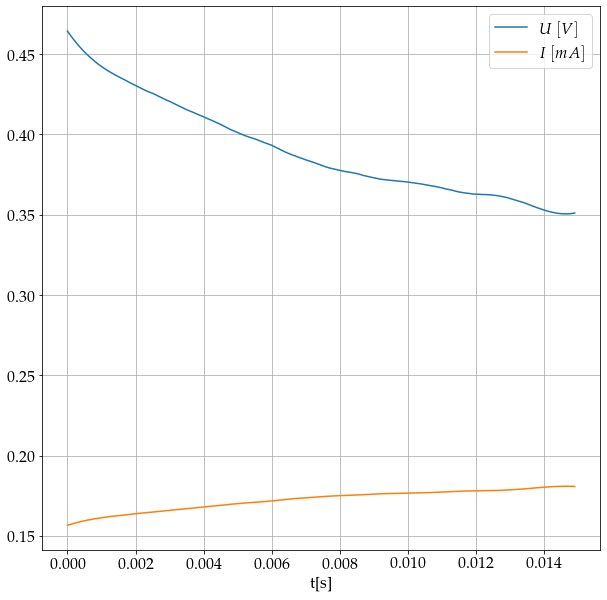

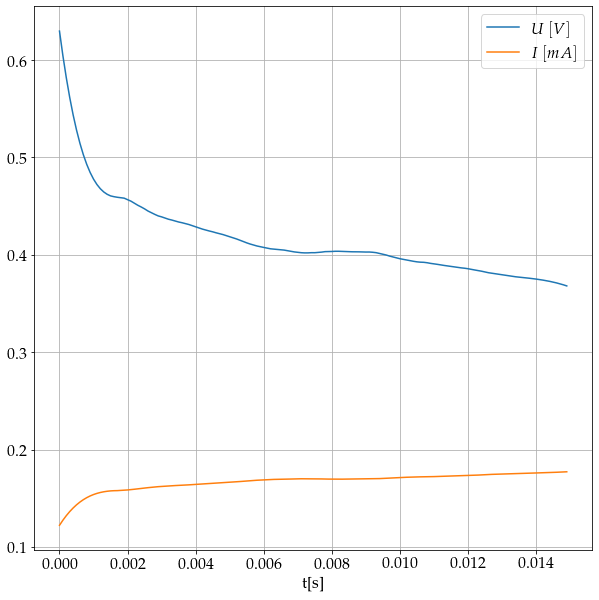

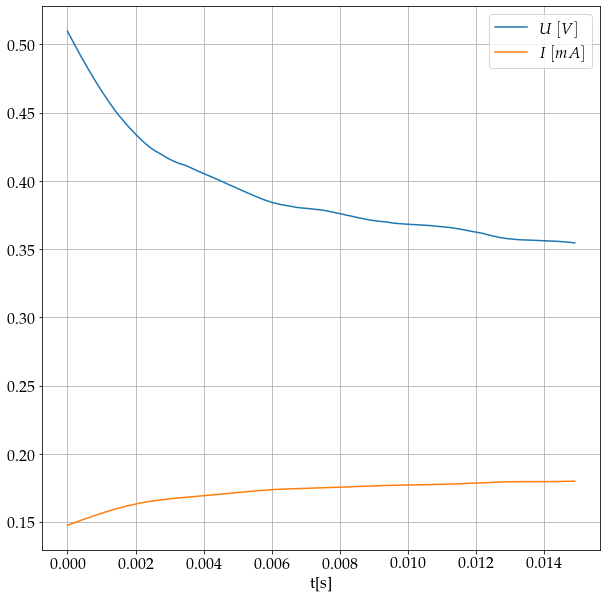

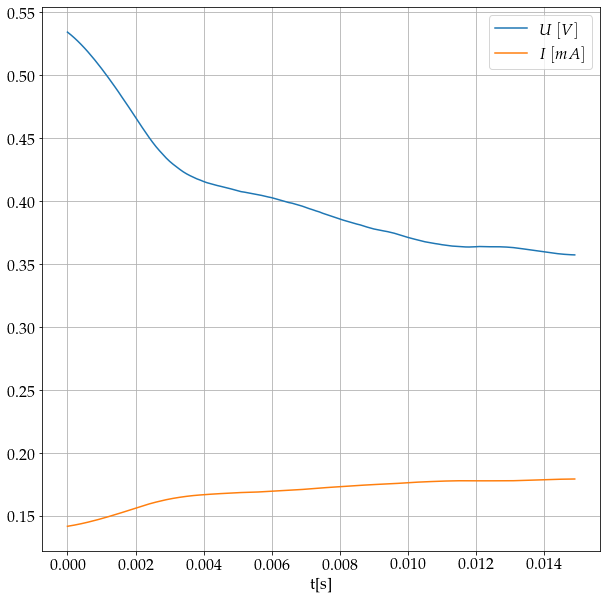

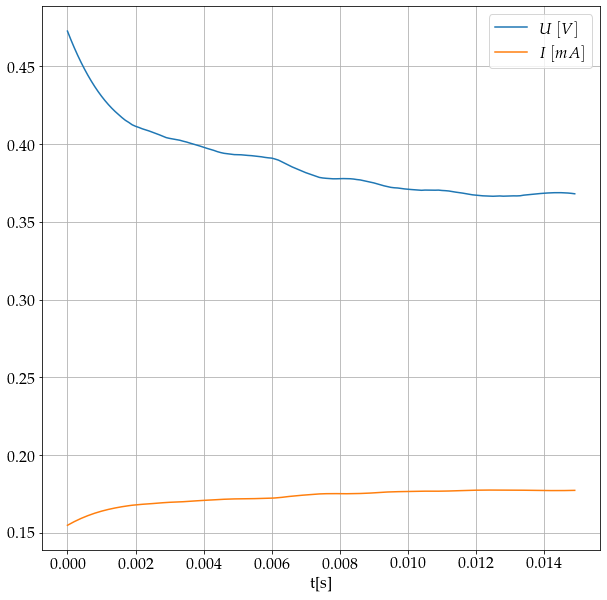

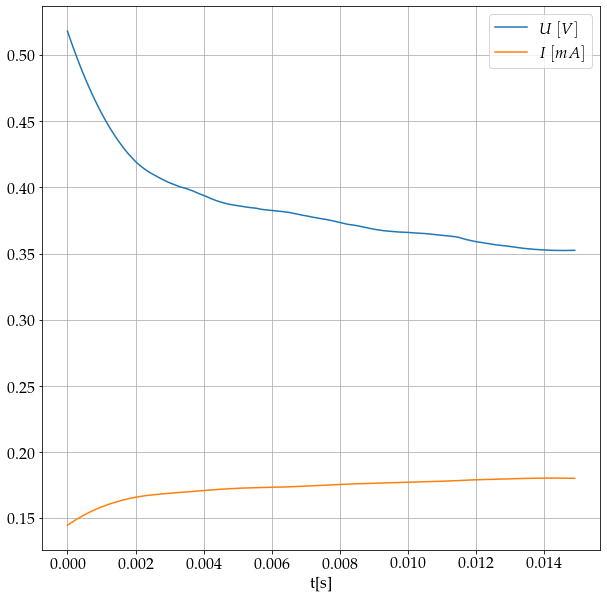

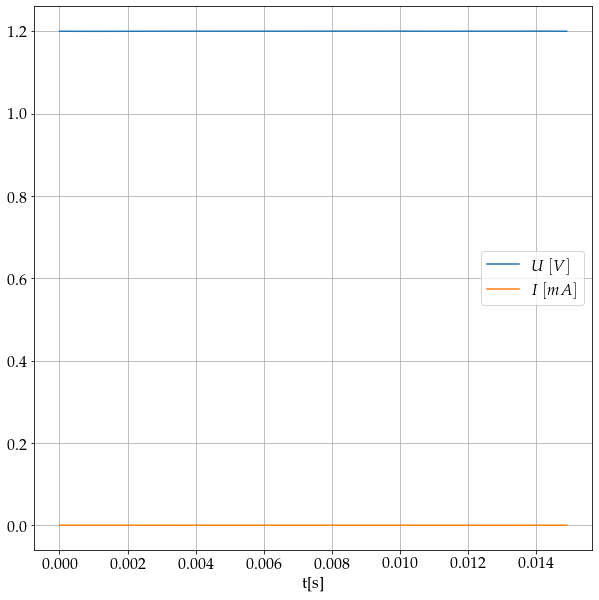

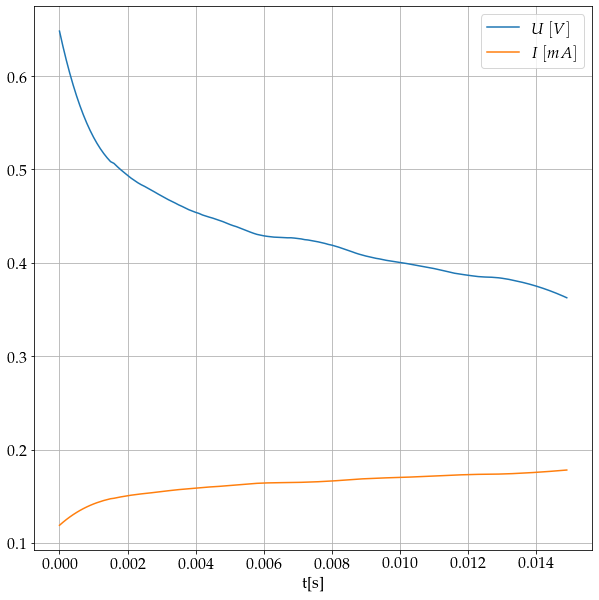

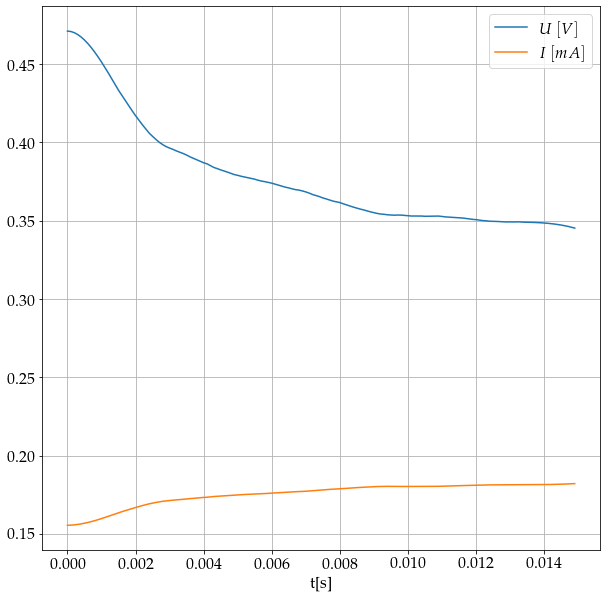

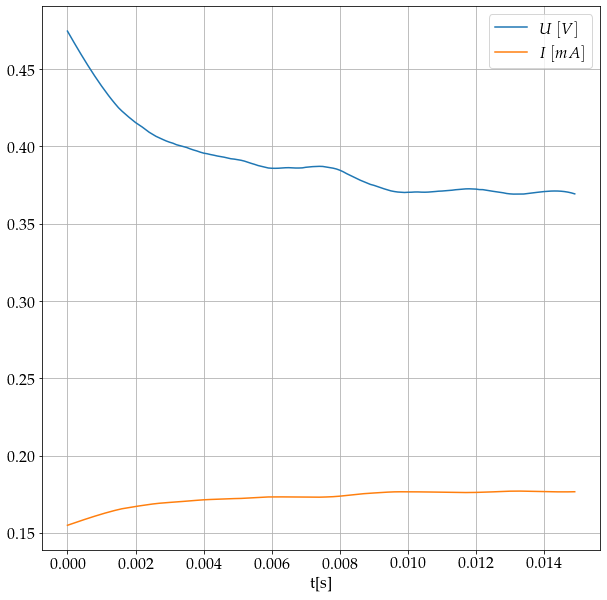

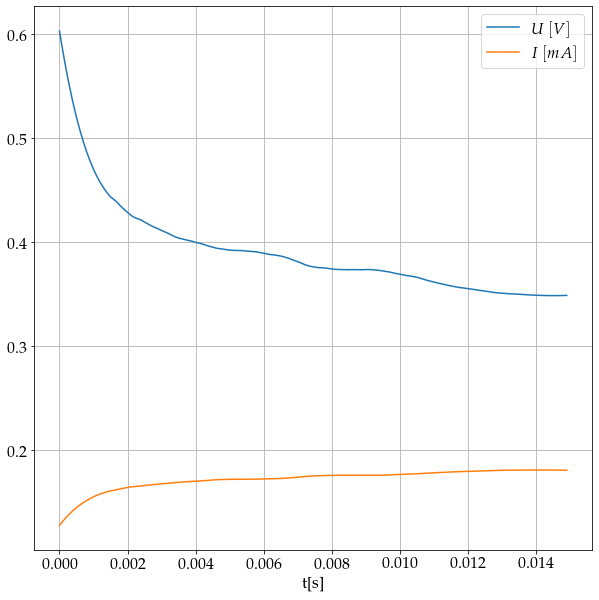

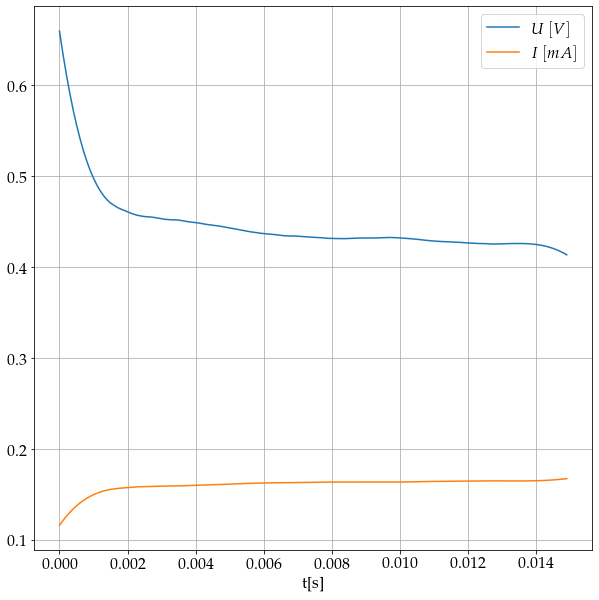

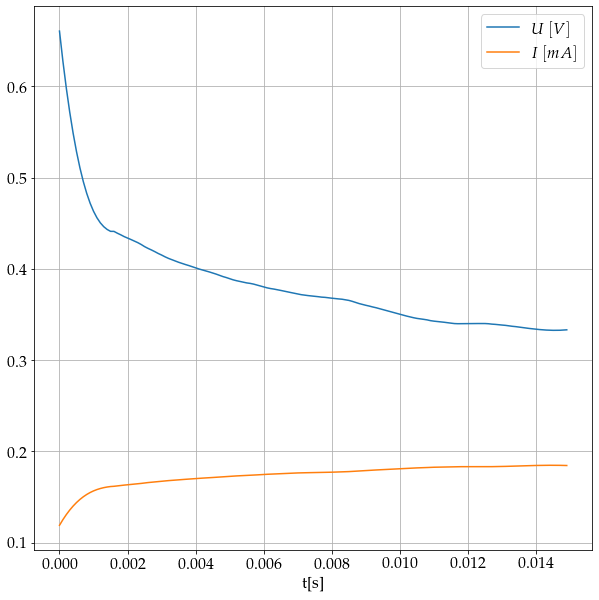

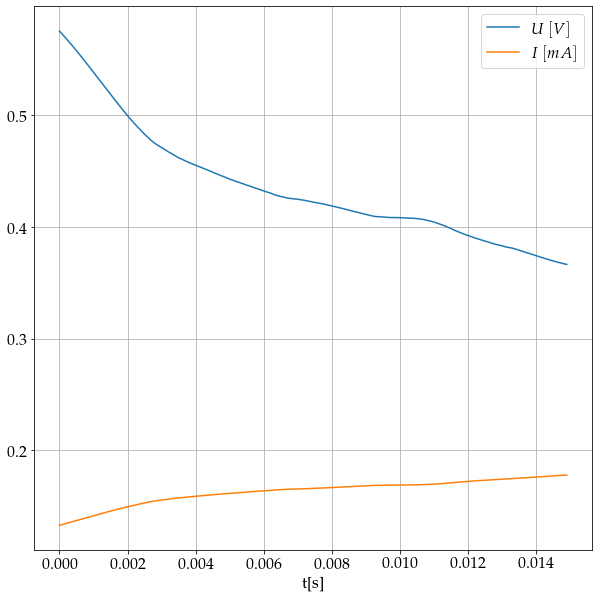

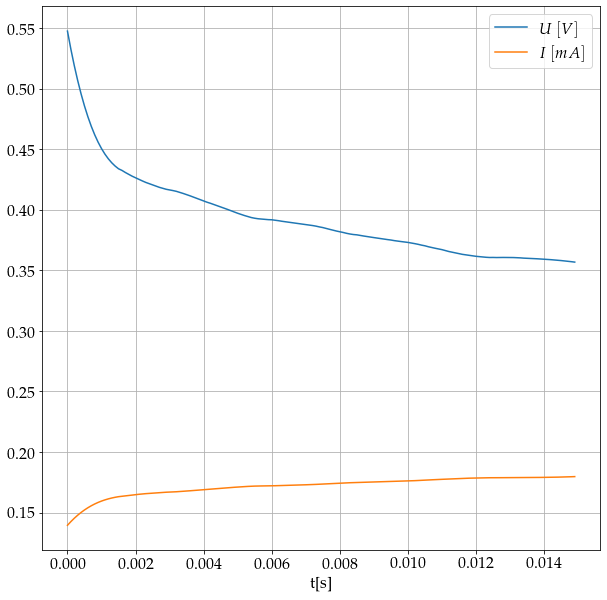

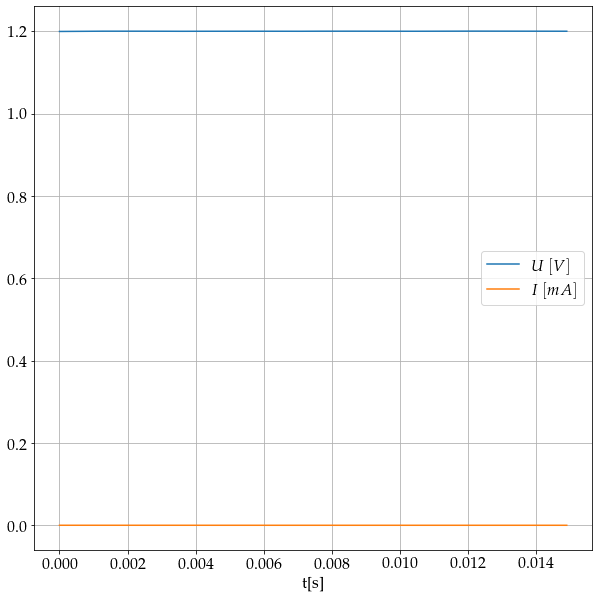

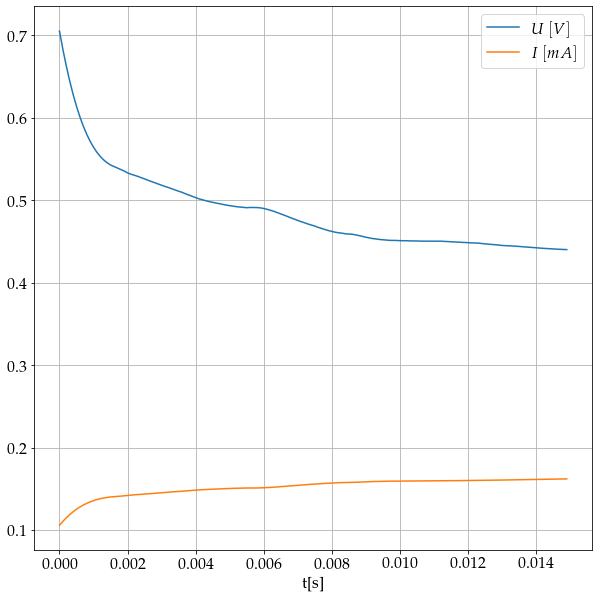

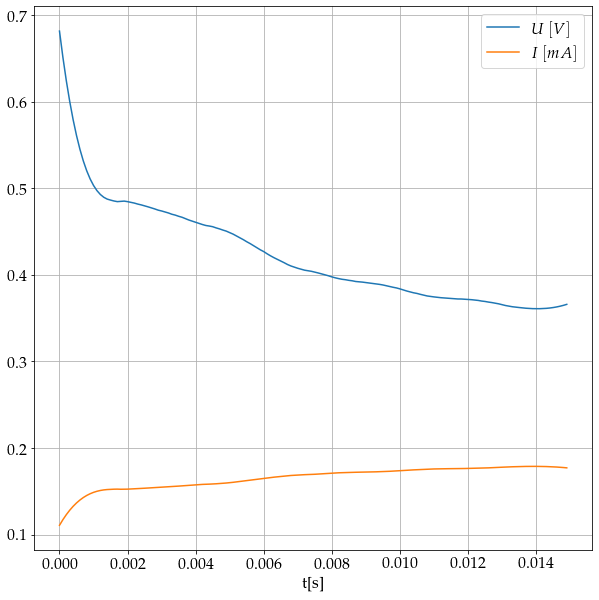

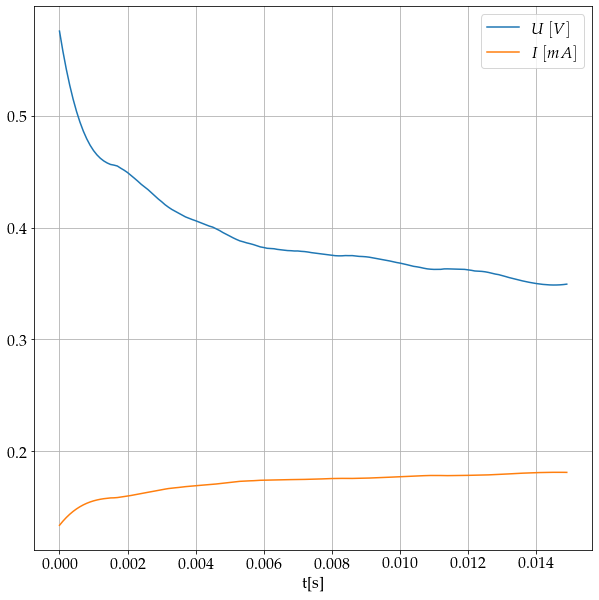

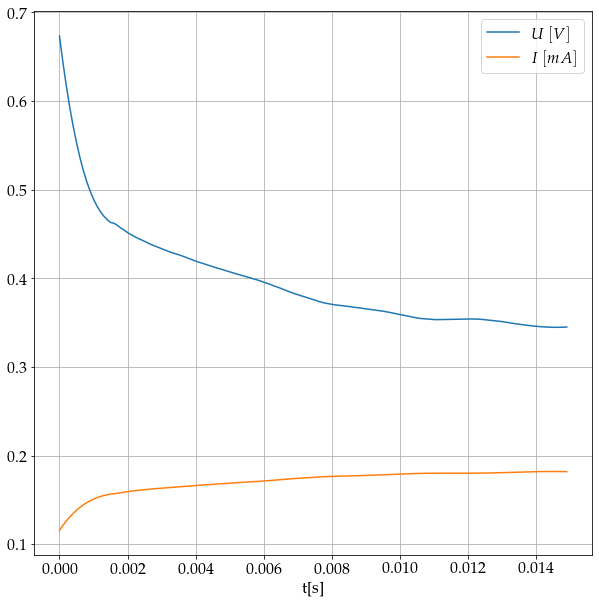

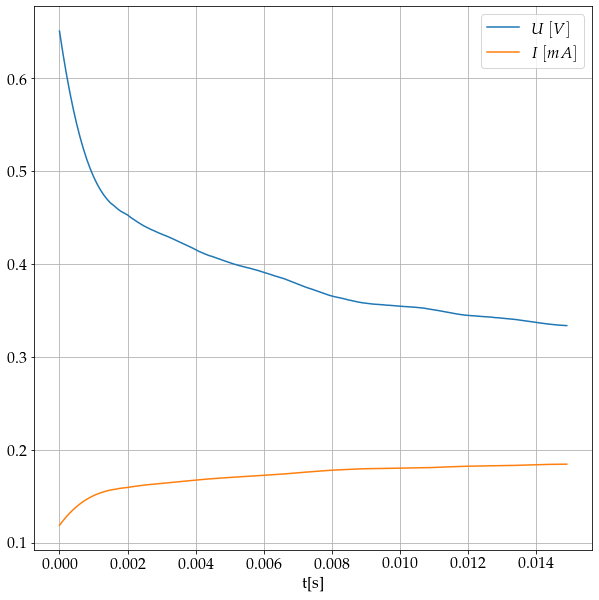

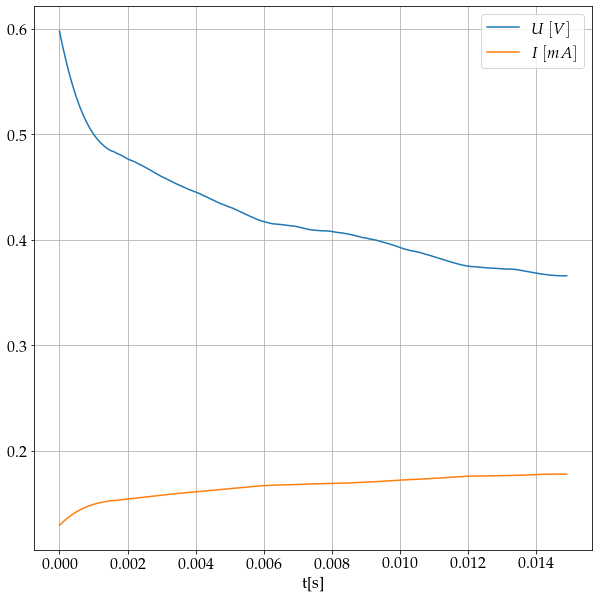

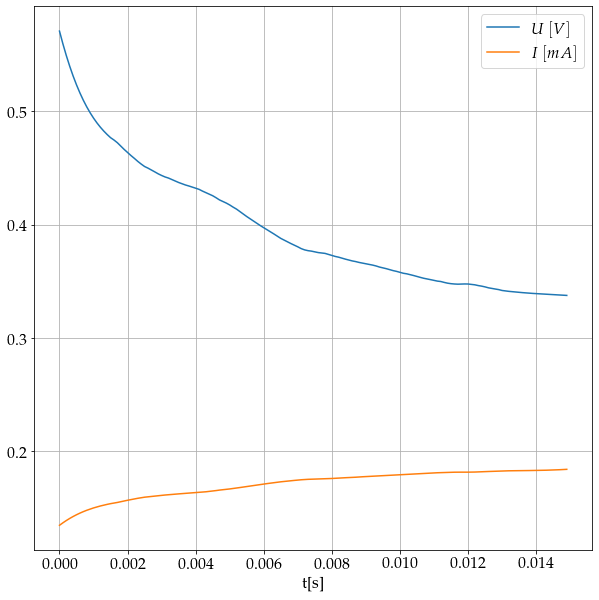

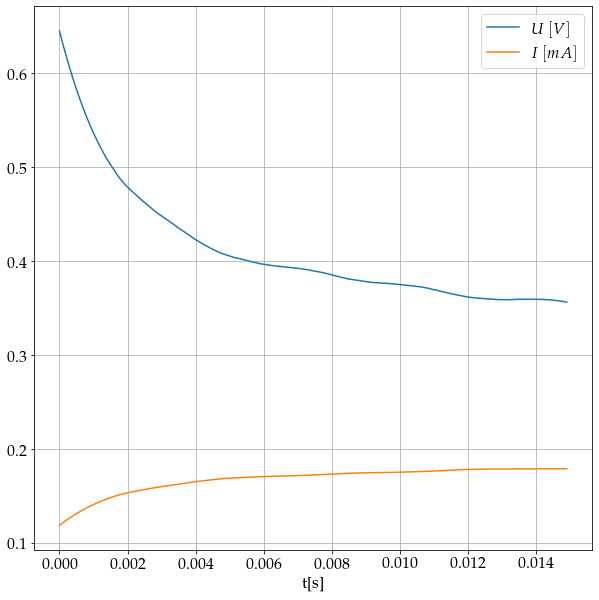

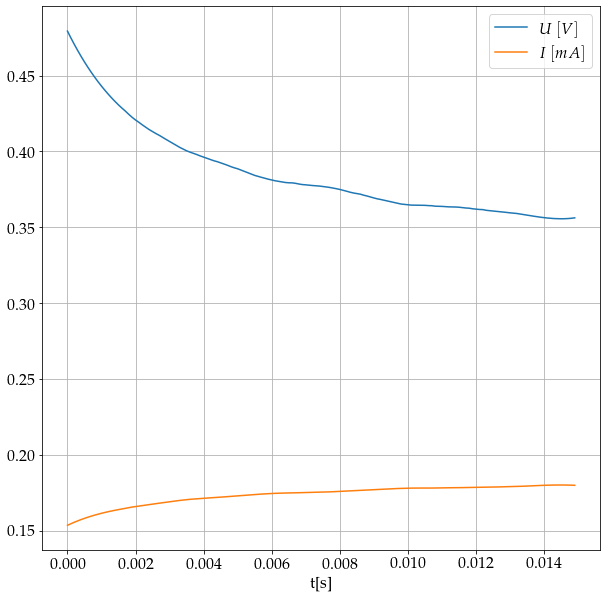

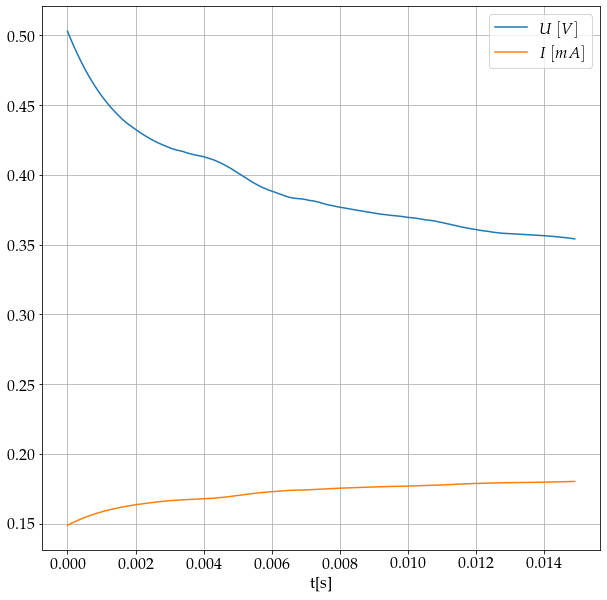

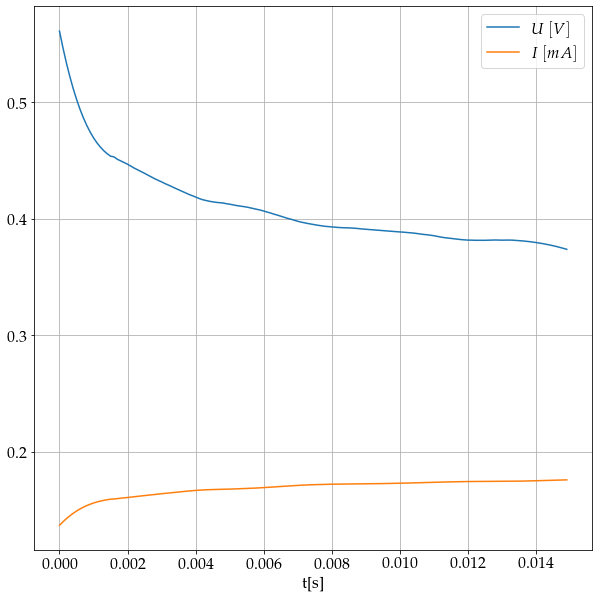

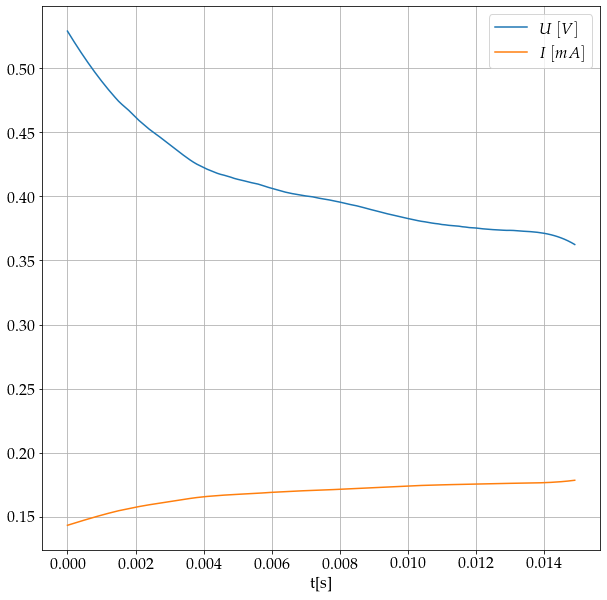

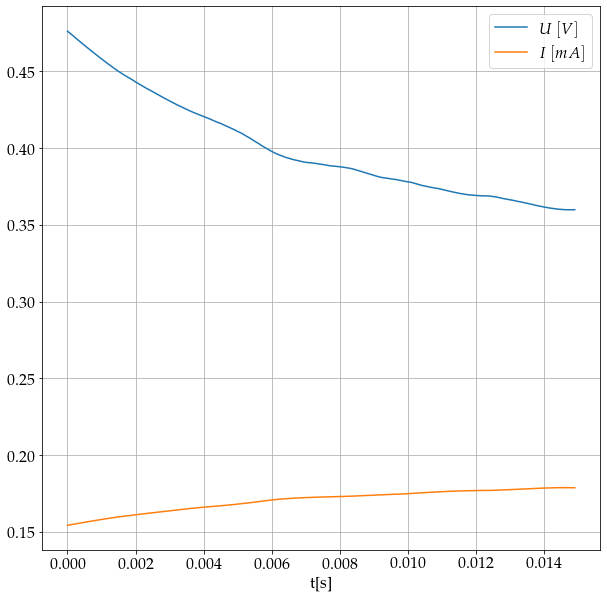

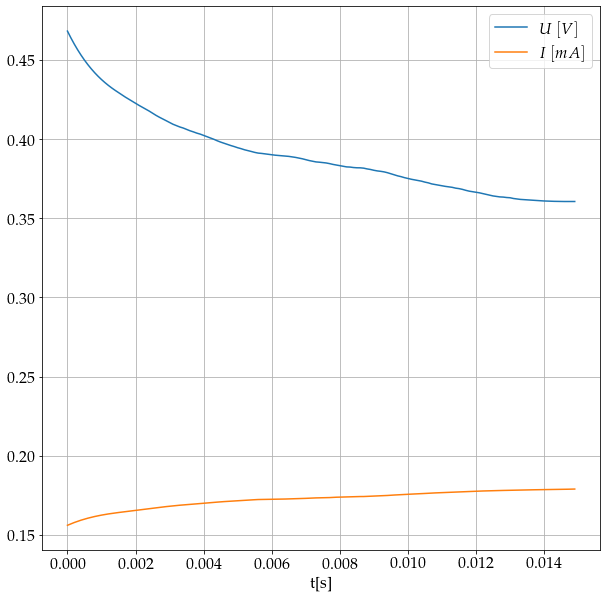

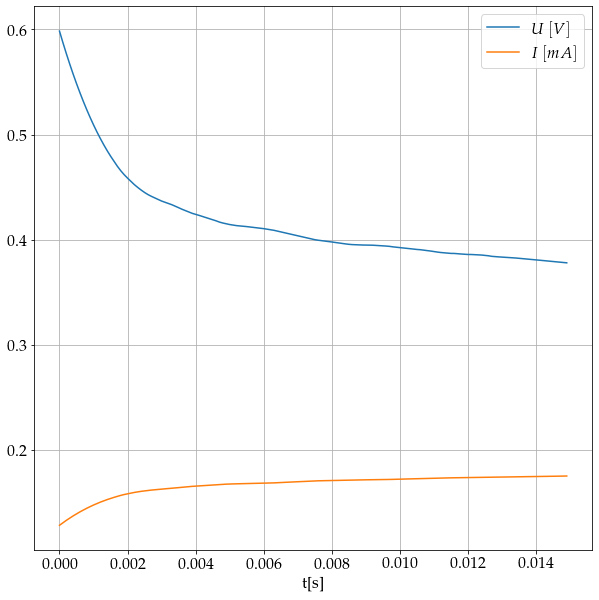

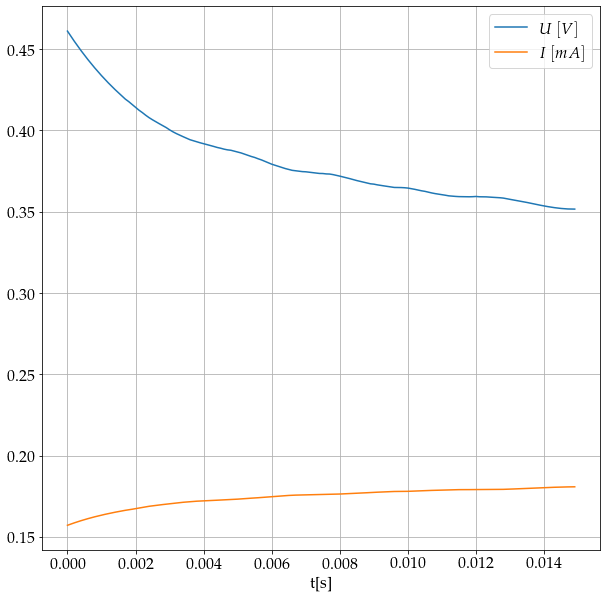

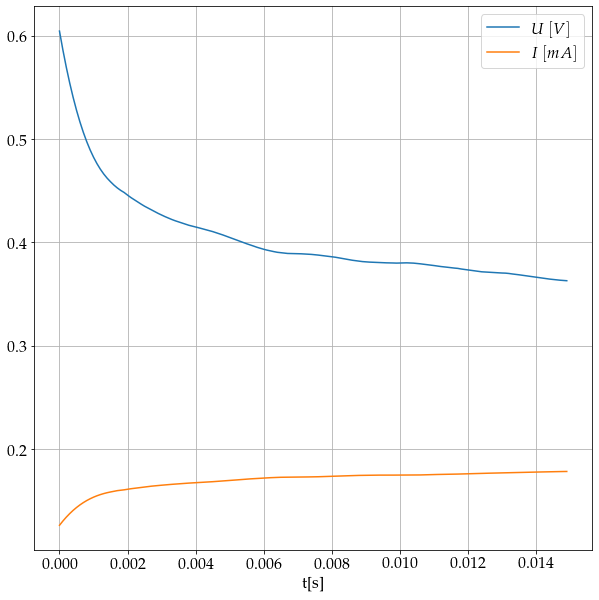

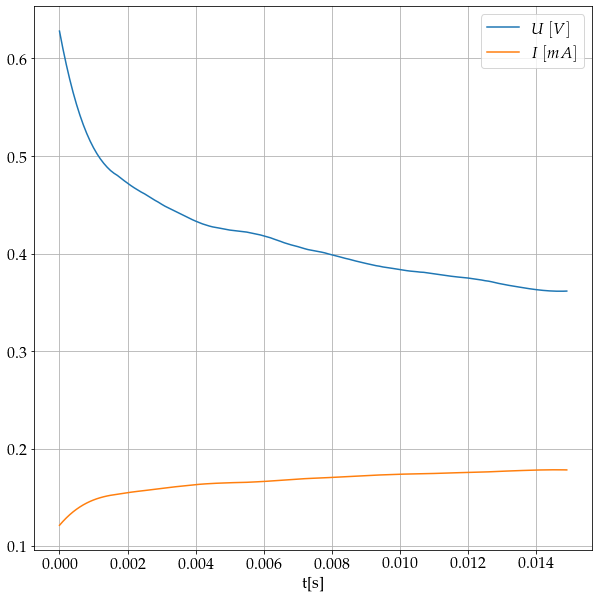

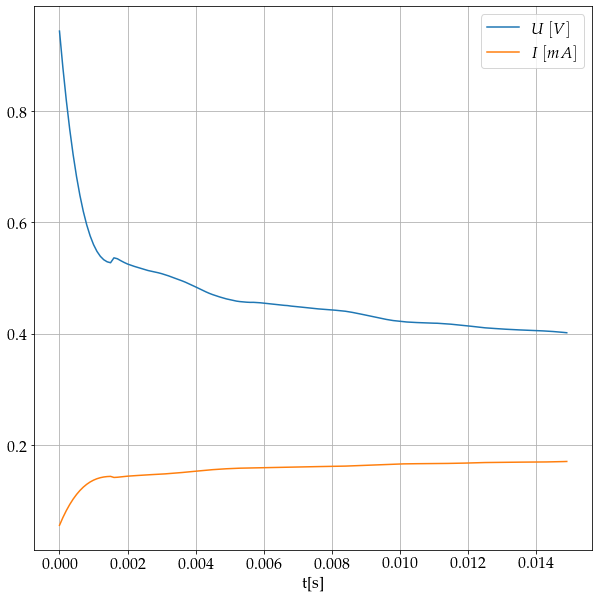

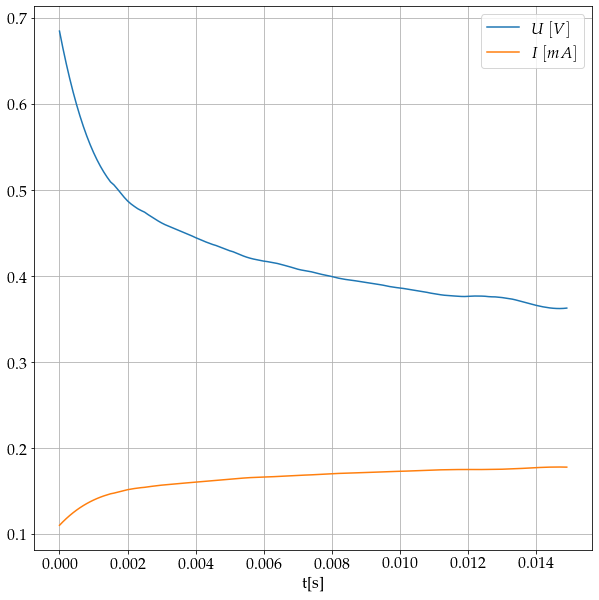

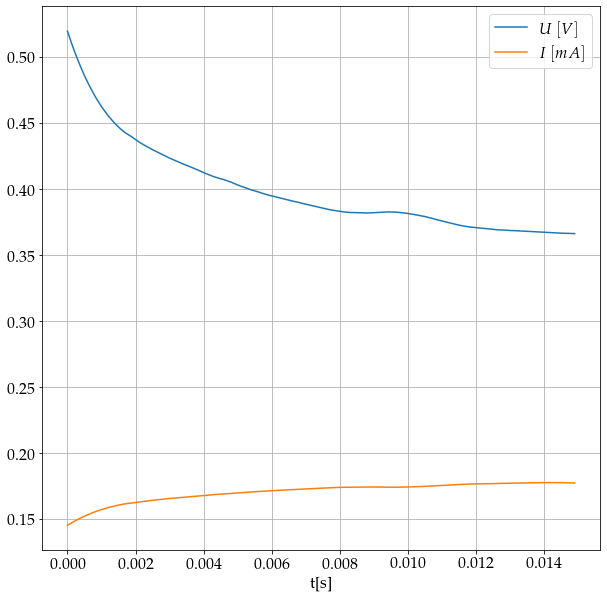

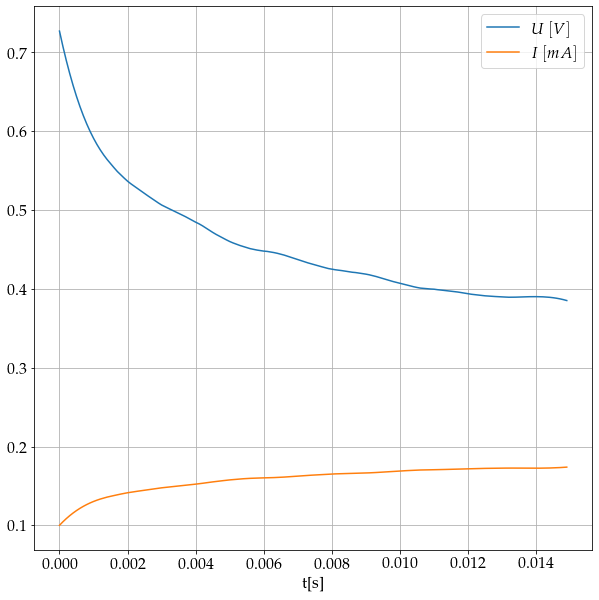

In [4]:
#fig, axs = plt.subplots(len(datas), 1,sharex=False,figsize=(10, len(datas)*10))
from scipy.signal import savgol_filter

for idx,data in enumerate(datas):
    data = datas[idx]
    f = plt.figure(figsize=(10, 10))
    plt.plot(data.t,savgol_filter(data.U,31,3),label = '$U\ [V]$')
    plt.plot(data.t,savgol_filter(data.I,31,3),label = '$I\ [mA]$')
    #plt.plot(data.t,data.U/data.I, label = '$R\ [k\Omega]$')
    #plt.ylim(0,10)
    plt.grid(True)
    plt.legend()
    plt.xlabel('t[s]')
    plt.savefig( f'pdfs/{idx}.pdf',format='pdf')



In [70]:
from PyPDF2 import PdfMerger
dir_pdf = 'Fitted_pdfs'
pdfs = os.listdir(dir_pdf)
pdfs_paths = [os.path.join(dir_pdf,pdf) for pdf in pdfs]
pdfs_paths


['Fitted_pdfs/9.pdf',
 'Fitted_pdfs/8.pdf',
 'Fitted_pdfs/16.pdf',
 'Fitted_pdfs/17.pdf',
 'Fitted_pdfs/29.pdf',
 'Fitted_pdfs/15.pdf',
 'Fitted_pdfs/14.pdf',
 'Fitted_pdfs/28.pdf',
 'Fitted_pdfs/10.pdf',
 'Fitted_pdfs/38.pdf',
 'Fitted_pdfs/39.pdf',
 'Fitted_pdfs/11.pdf',
 'Fitted_pdfs/13.pdf',
 'Fitted_pdfs/12.pdf',
 'Fitted_pdfs/23.pdf',
 'Fitted_pdfs/37.pdf',
 'Fitted_pdfs/36.pdf',
 'Fitted_pdfs/22.pdf',
 'Fitted_pdfs/34.pdf',
 'Fitted_pdfs/20.pdf',
 'Fitted_pdfs/21.pdf',
 'Fitted_pdfs/35.pdf',
 'Fitted_pdfs/31.pdf',
 'Fitted_pdfs/25.pdf',
 'Fitted_pdfs/19.pdf',
 'Fitted_pdfs/18.pdf',
 'Fitted_pdfs/24.pdf',
 'Fitted_pdfs/30.pdf',
 'Fitted_pdfs/26.pdf',
 'Fitted_pdfs/32.pdf',
 'Fitted_pdfs/33.pdf',
 'Fitted_pdfs/27.pdf',
 'Fitted_pdfs/40.pdf',
 'Fitted_pdfs/6.pdf',
 'Fitted_pdfs/7.pdf',
 'Fitted_pdfs/41.pdf',
 'Fitted_pdfs/5.pdf',
 'Fitted_pdfs/43.pdf',
 'Fitted_pdfs/42.pdf',
 'Fitted_pdfs/4.pdf',
 'Fitted_pdfs/0.pdf',
 'Fitted_pdfs/46.pdf',
 'Fitted_pdfs/47.pdf',
 'Fitted_pdfs/1.pd

In [5]:
merger = PdfMerger()
for pdf in pdfs_paths:
    merger.append(pdf)

merger.write(os.path.join(dir_pdf,'I=f(t)_dopasowanie.pdf'))
merger.close()

NameError: name 'PdfMerger' is not defined

In [ ]:
len(datas)

In [ ]:
fig, axs = plt.subplots(len(datas), 1,sharex=False,figsize=(10, len(datas)*10))
for idx,ax in enumerate(axs.flat):
    data = datas[idx]
    ax.plot(data.t,data.U,label = '$U\ [V]$')
    ax.plot(data.t,data.I,label = '$I\ [mA]$')
    #ax.plot(data.t,data.U/data.I, label = '$R\ [k\Omega]$')
    #ax.set_ylim(0,10)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('t[s]')


plt.savefig('U,I=f(t).pdf',format='pdf')

In [ ]:
for data in datas:
    data["P"] = data['I']*data['U']
fig, axs = plt.subplots(len(datas), 1,sharex=False,figsize=(10, len(datas)*10))
for idx,ax in enumerate(axs.flat):
    data = datas[idx]
    ax.plot(data.t,data.P,label = '$P\ [mW]$')
    #ax.plot(data.t,data.I,label = '$I\ [mA]$')
    #ax.plot(data.t,data.U/data.I, label = '$R\ [k\Omega]$')
    #ax.set_ylim(0,10)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('t[s]')

In [ ]:
dir2 = './EandQ_pdf_files'

if  not (os.path.exists(dir2)):
    os.makedirs(dir2)




for idx2, data in enumerate(datas):

    I = data.I.to_numpy()
    t = data.t.to_numpy()
    P = data.P.to_numpy()
    q = np.zeros(I.shape[0])
    E = np.zeros(I.shape[0])

    for idx,_ in enumerate(I):
        q[idx] = np.trapz(y=I[:idx], x=t[:idx])
        E[idx] = np.trapz(y=P[:idx], x=t[:idx])

    fig,ax1 = plt.subplots(figsize=(10,10))

    ax2 = ax1.twinx()
    ax1.plot(t,E,'b--')
    ax2.plot(t,q,'r-')
    ax1.set_xlabel("$t\ [s]$")
    ax1.set_ylabel("$E\ [mW]$", color='b',fontdict={'size':14})
    ax2.set_ylabel("$q\ [mC]$", color='r',fontdict={'size':14})
    ax2.tick_params(axis='y', labelcolor='r',colors='r', labelsize=12)
    ax1.tick_params(axis='y', labelcolor='b',colors='b', labelsize=12)
    ax1.grid(True)
    plt.savefig(os.path.join(dir2, f'{str(idx2)}.pdf'), format='pdf')





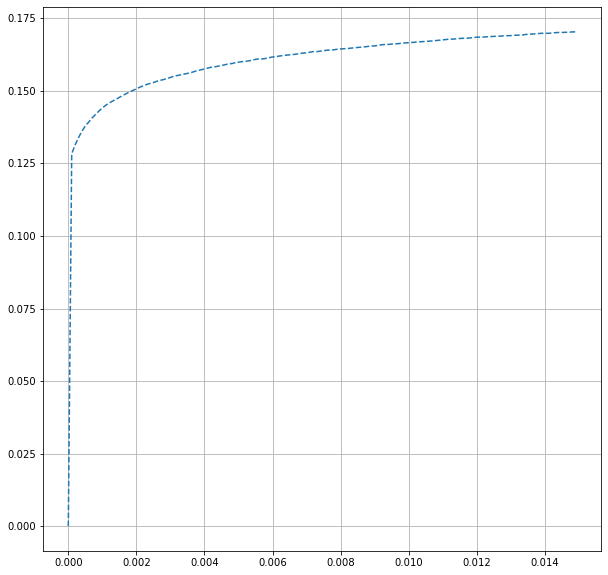

In [ ]:
data_example = datas[0]
data_example = data_example.I.to_numpy()
I_mean = np.zeros(data_example.shape[0])

for idx,_ in enumerate(I_mean):
    if idx == 0:
        I_mean[idx] = 0
    else:     
        getting_list = [data.iloc[idx,2] for data in datas]
        I_mean[idx] = np.mean(getting_list)

plt.figure(figsize=(10,10 ))
plt.plot(t,I_mean,'--')
plt.grid(True)

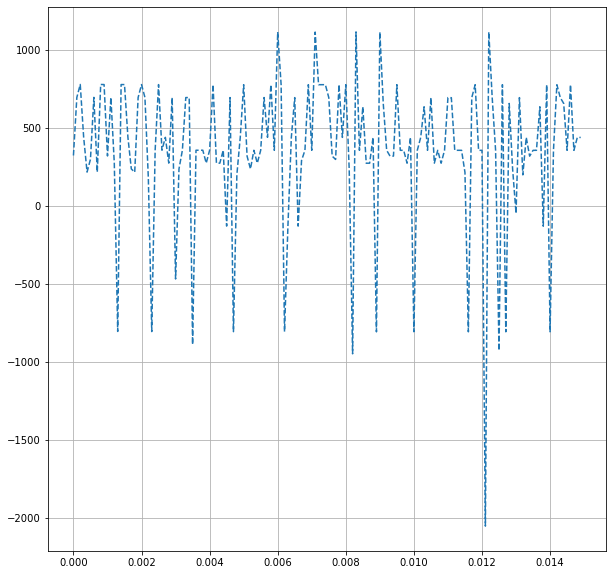

In [ ]:
data_example = datas[0]
data_example = data_example.I.to_numpy()
R_mean = np.zeros(data_example.shape[0])
I_mean = np.zeros(data_example.shape[0])

for idx,_ in enumerate(I_mean):
        getting_list = [data.iloc[idx,1]/data.iloc[idx,2] for data in datas]
        getting_list2 = [data.iloc[idx,2] for data in datas]
        R_mean[idx] = np.mean(getting_list)
        I_mean[idx] = np.mean(getting_list2)

plt.figure(figsize=(10,10 ))
plt.plot(t,R_mean,'--')
plt.grid(True)

In [ ]:
from gekko import GEKKO

m = GEKKO()


x = m.Param(value=t)
R_on =  m.FV(lb = 0,ub = 10)

R_off = m.FV(lb=0,ub = 1000)

tau = m.FV(lb=0,ub=0.01)


R_off.STATUS = 1
R_on.STATUS = 1
tau.STATUS = 1

E = 1.2

y = m.CV(value=R_mean)
y.FSTATUS = 1

m.Equation(y == R_on  -  (R_on-R_off) * m.exp(-1*x/tau))
m.options.EV_TYPE = 2
m.options.IMODE = 2
#.options.LINEAR = 0
m.options.MAX_ITER = 1e4
#m.options.COLDSTART = 1
m.solve()

apm 83.28.236.70_gk_model10 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            153
 Number of total equations: -          150
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

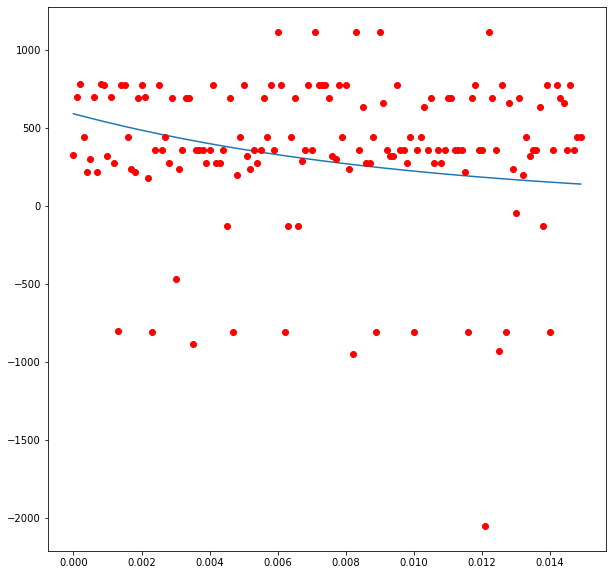

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(x.value, y.value,)
plt.plot(t,R_mean,'ro')


In [ ]:
print(R_on.VALUE[0],R_off.VALUE[0],tau.VALUE[0])


10.0 591.82558264 0.01


In [ ]:
from scipy.optimize import curve_fit
import math


def fit_function(x, R_on, R_off, tau):
    E = 1.2
    return  E/R_on  -  (E/R_on-E/R_off) * np.exp(-1*x/tau)


popt,_= curve_fit(fit_function, t, I_mean,method = 'trf', bounds=([0,6,0],[100,100000,0.1]))
popt

array([7.09725379e+00, 9.04740642e+00, 3.41894593e-03])

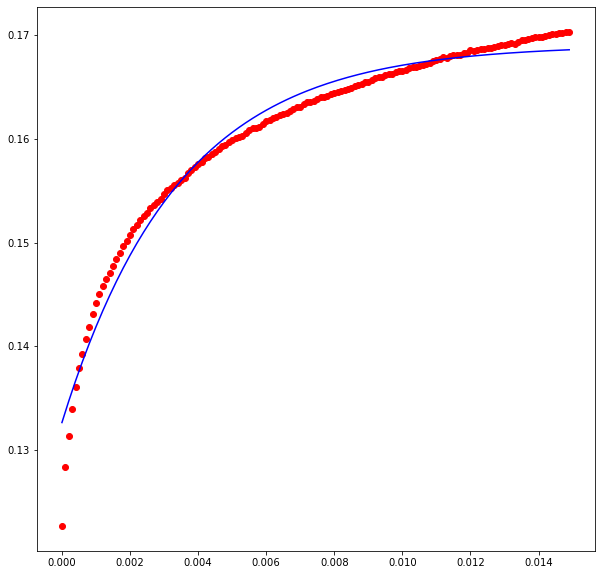

In [ ]:
R_on, R_off, tau = popt


I_scikit = fit_function(t,R_on, R_off, tau)

plt.figure(figsize=(10,10))
plt.scatter(t,I_mean, c='r', label= 'Wartości rzeczywiste')
plt.plot(t,I_scikit, c='b', label= 'Wartości dopasowane')




apm 83.28.236.70_gk_model64 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            153
 Number of total equations: -          150
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

/var/folders/yl/yry63jv13m75yc_y50wzm1kr0000gn/T/ipykernel_15119/1260919808.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


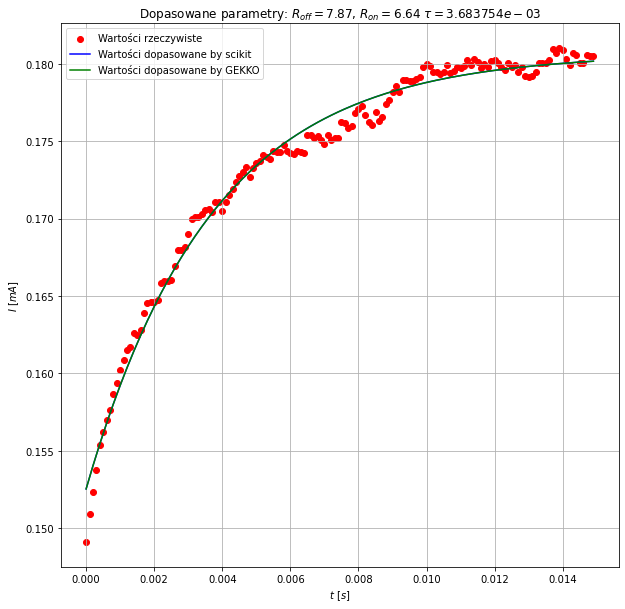

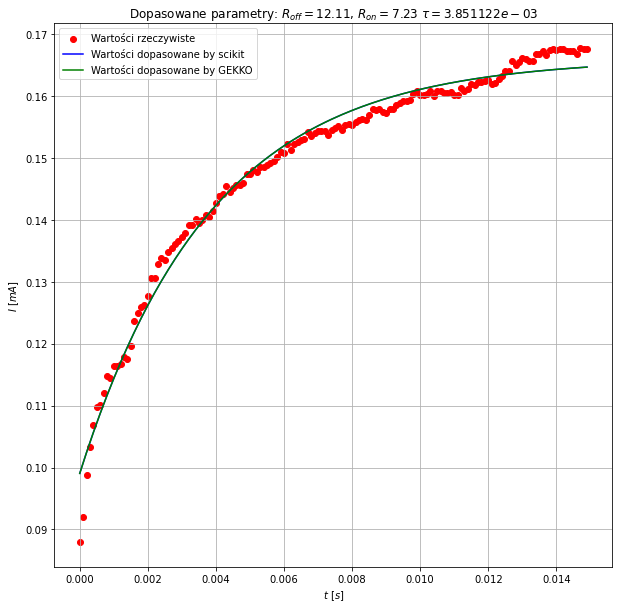

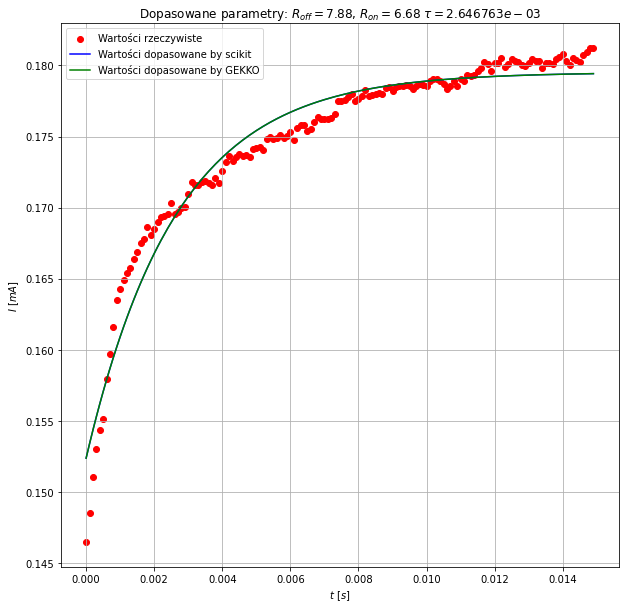

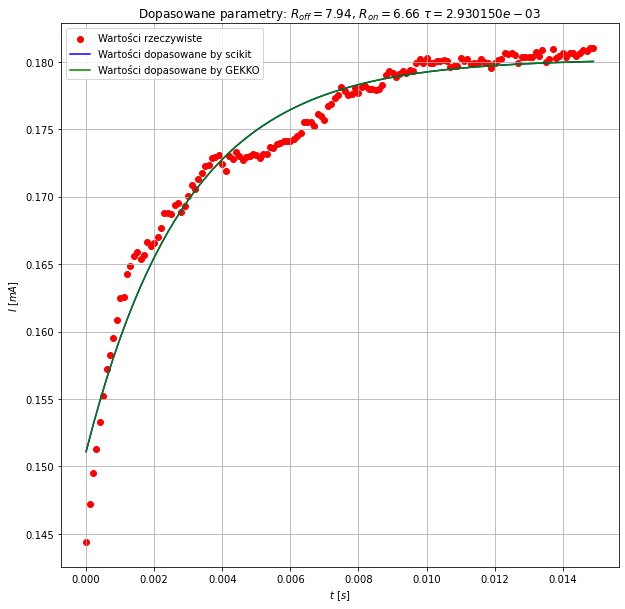

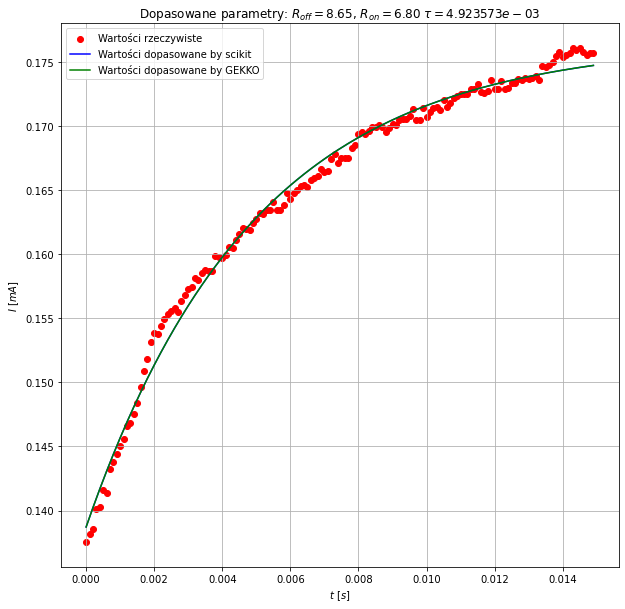

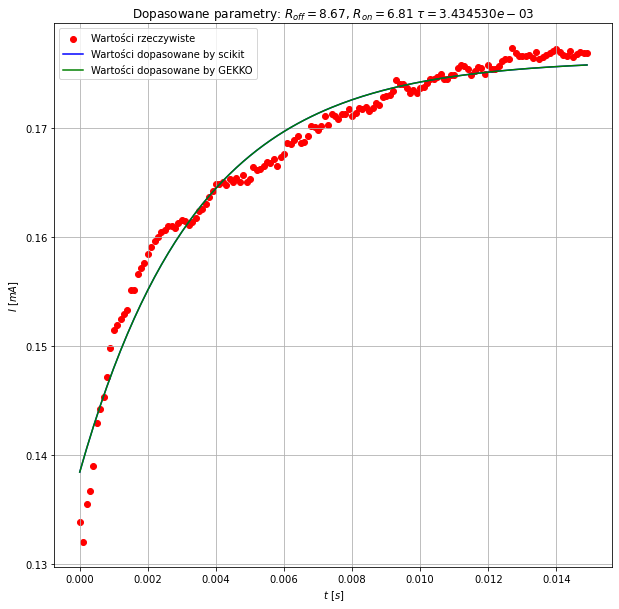

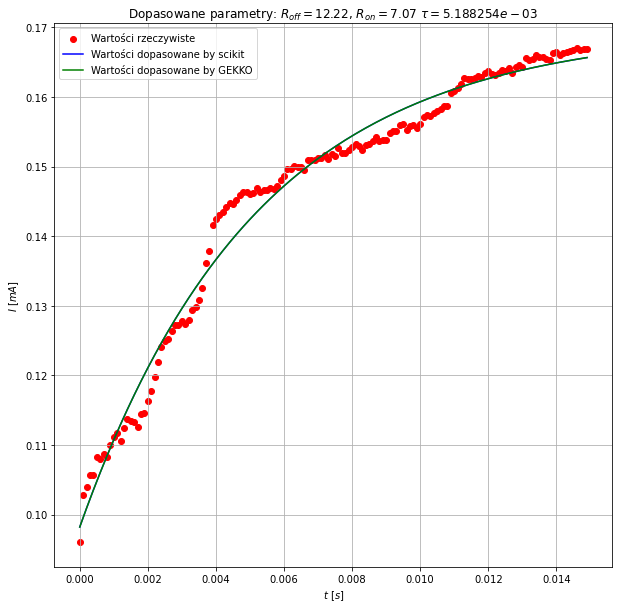

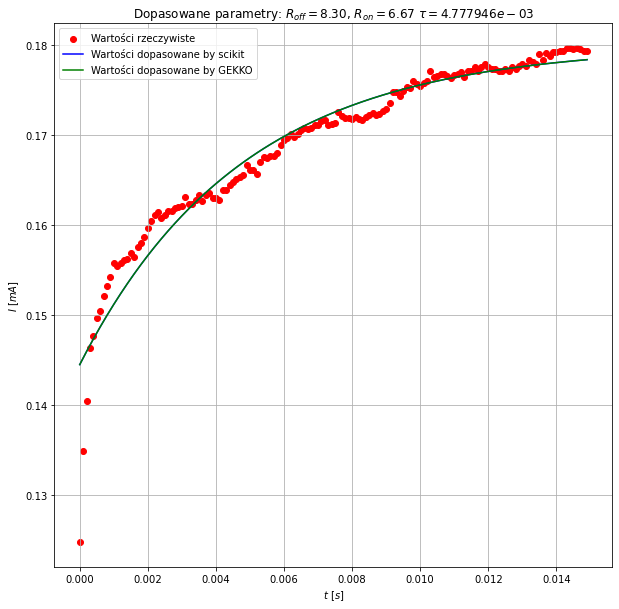

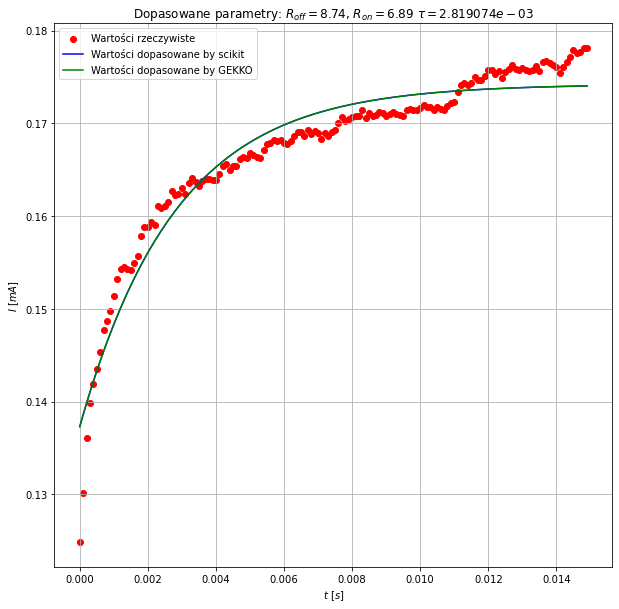

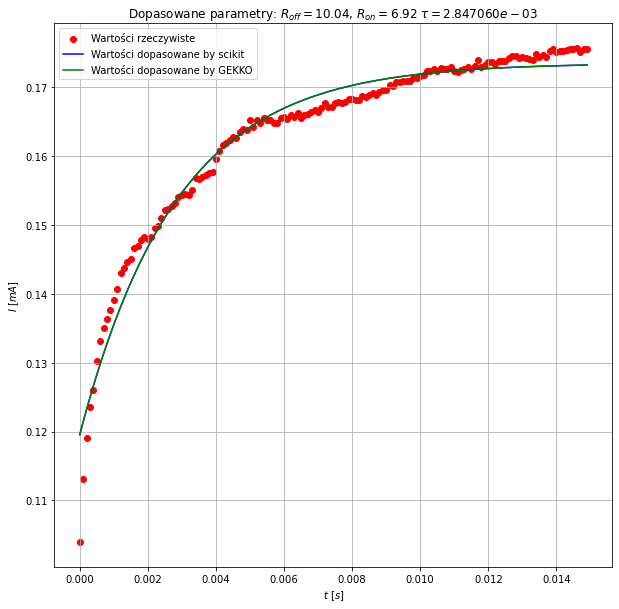

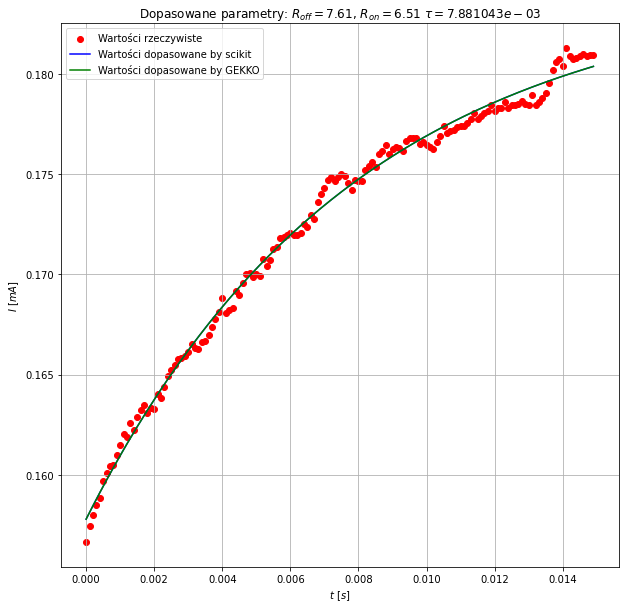

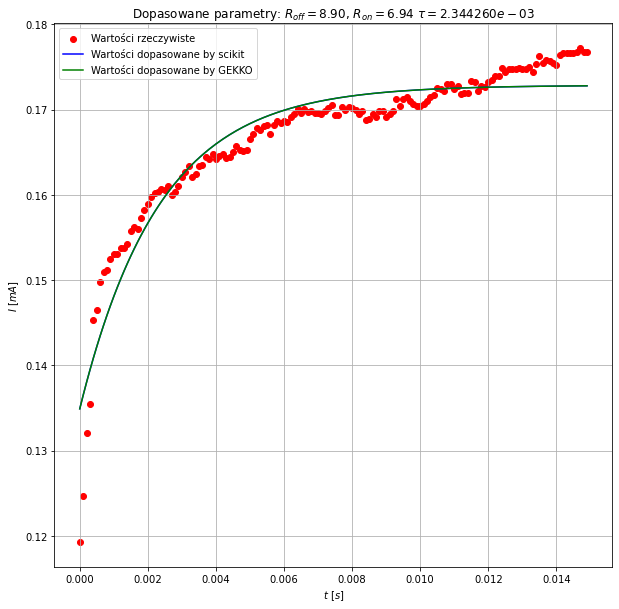

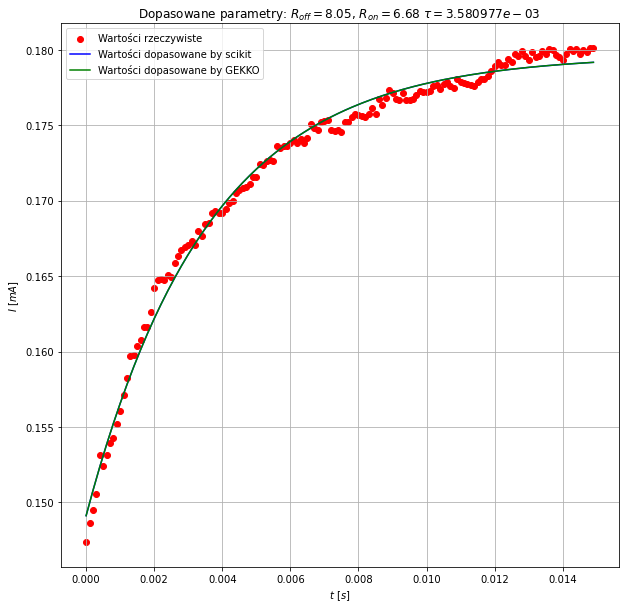

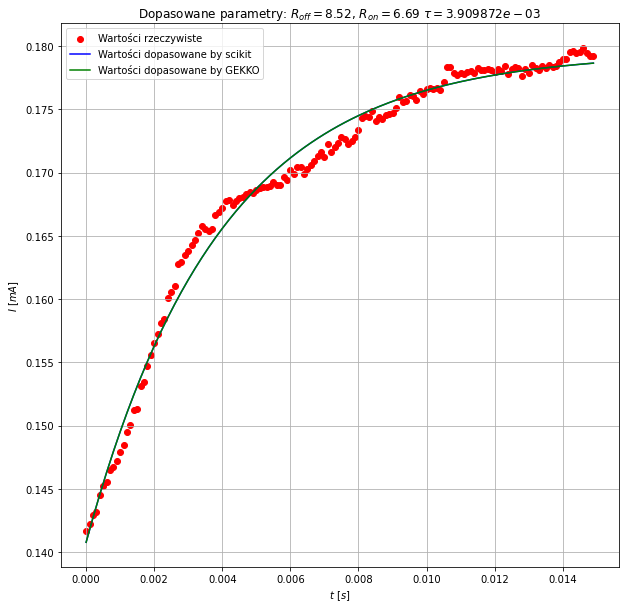

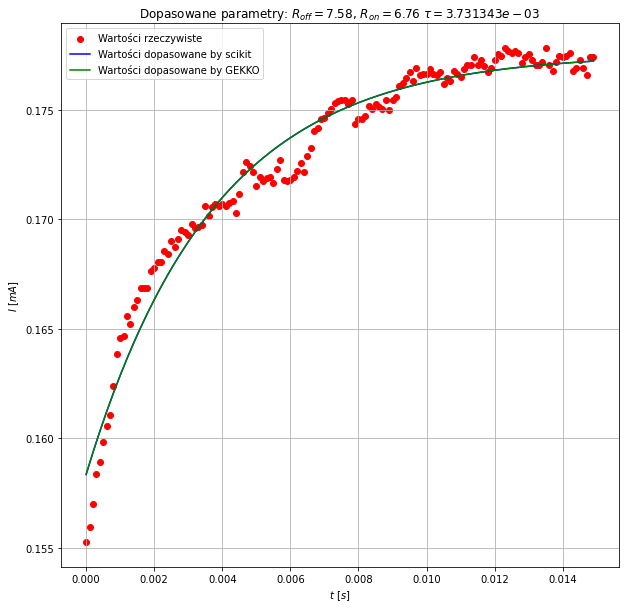

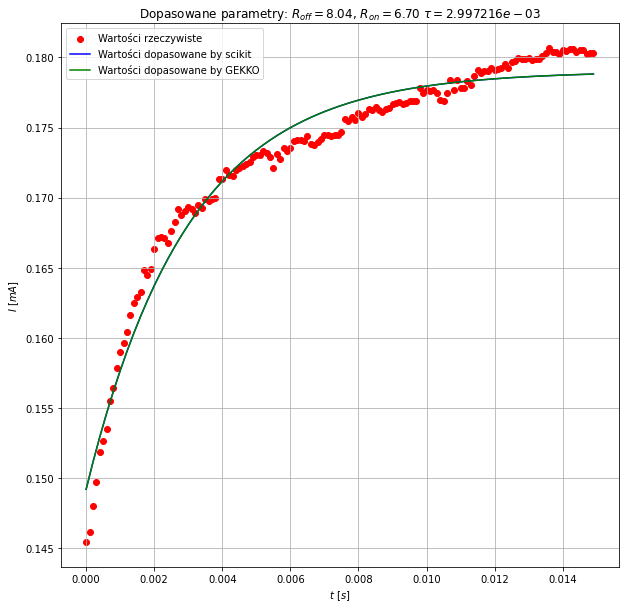

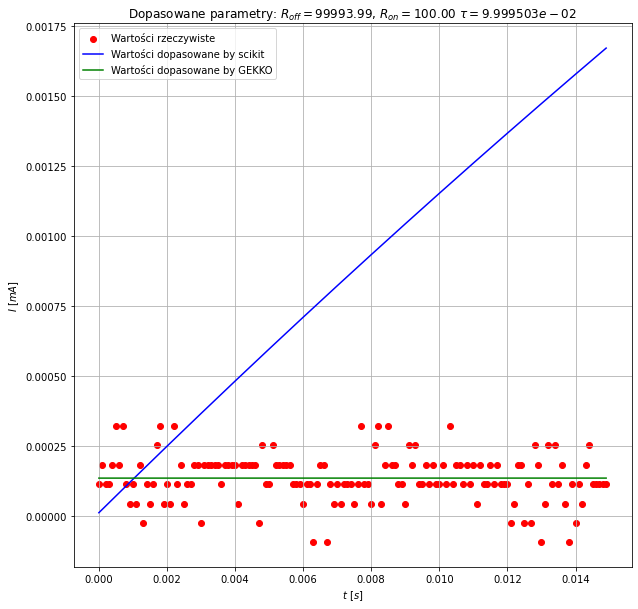

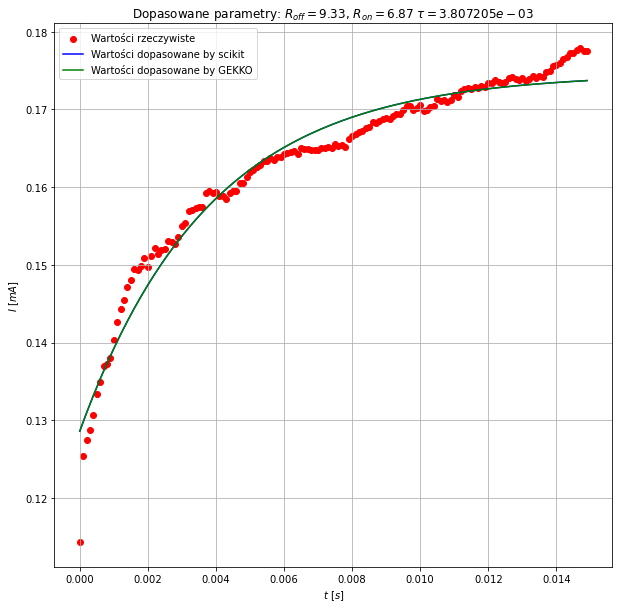

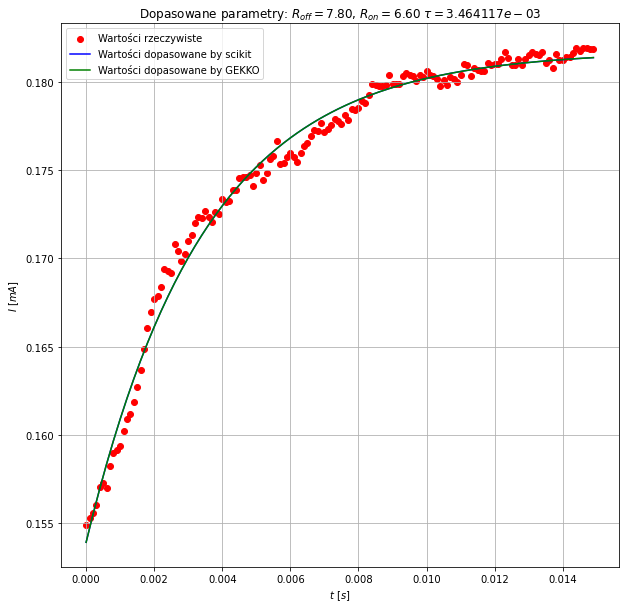

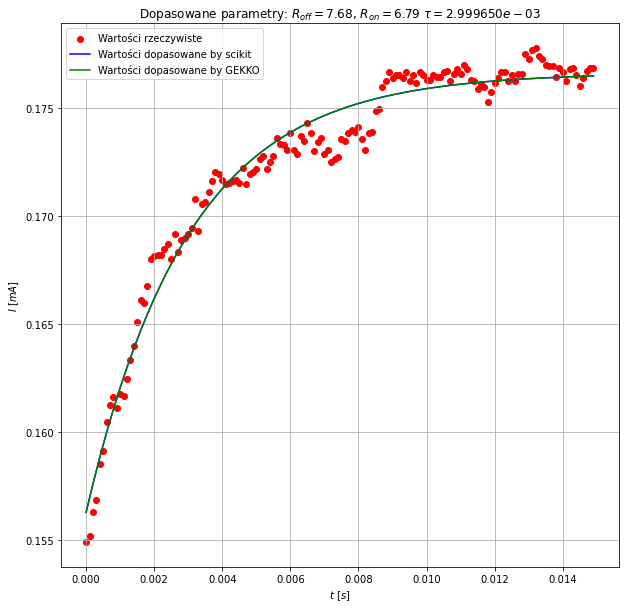

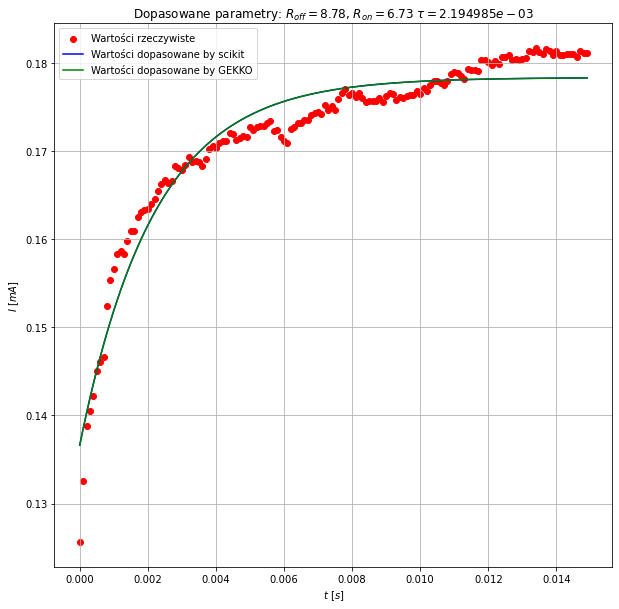

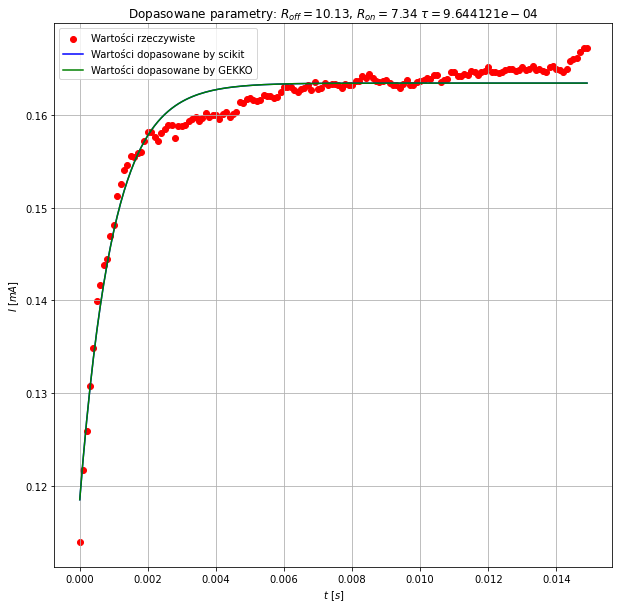

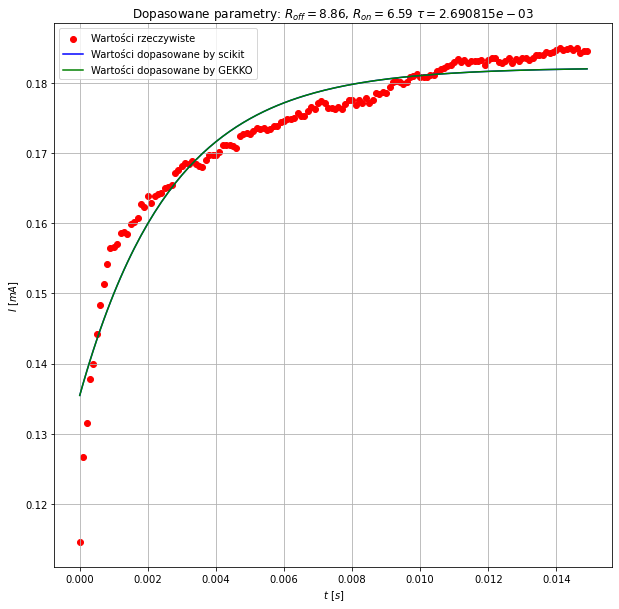

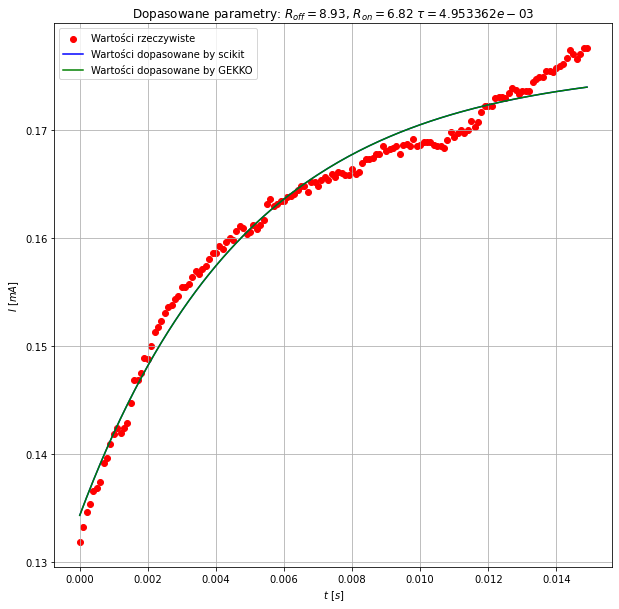

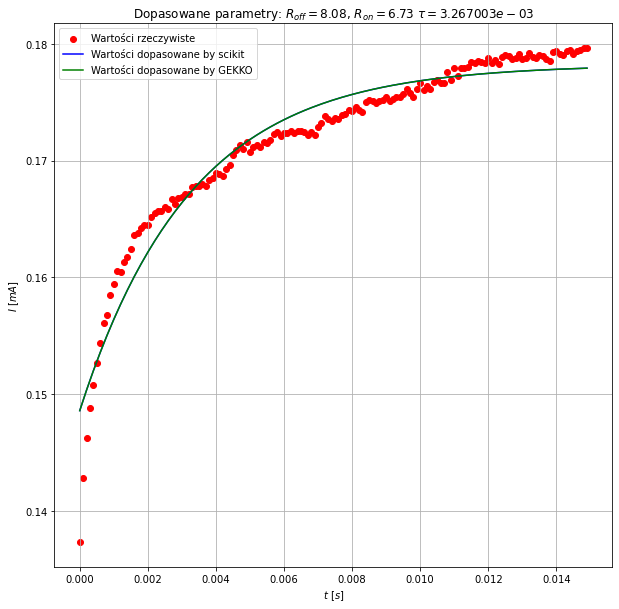

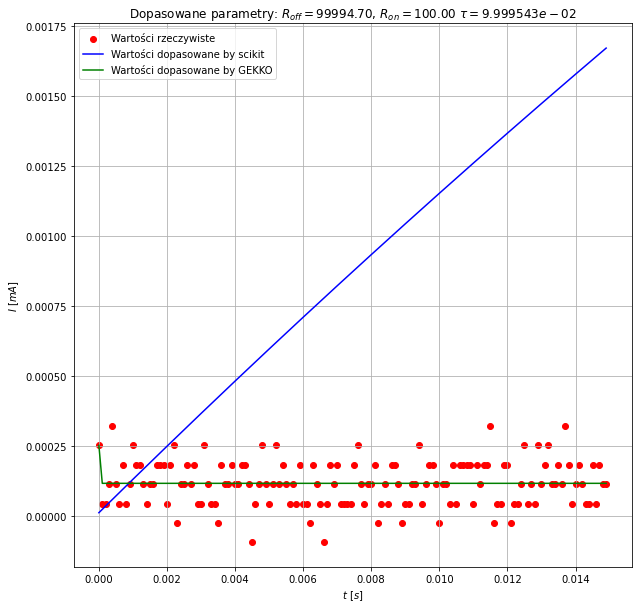

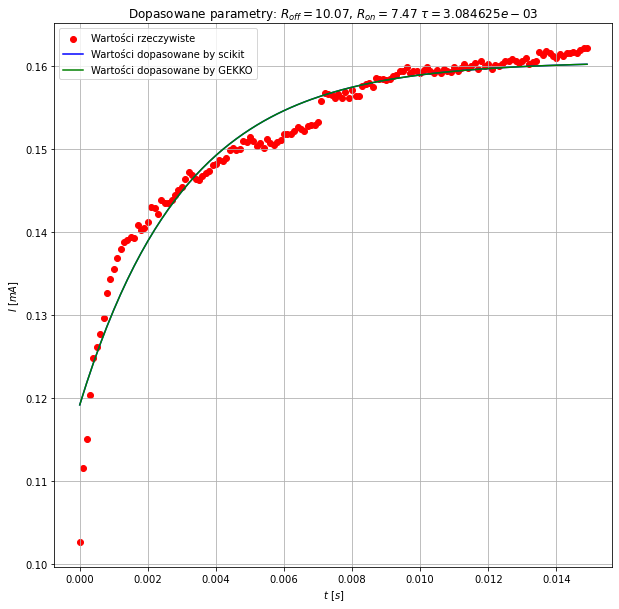

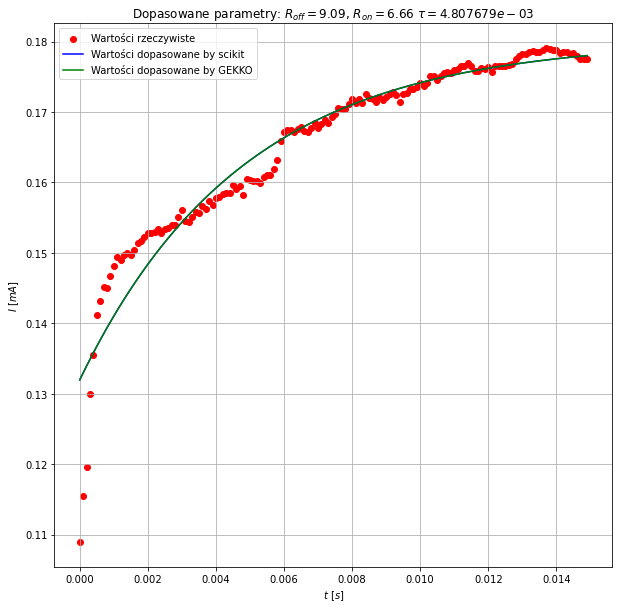

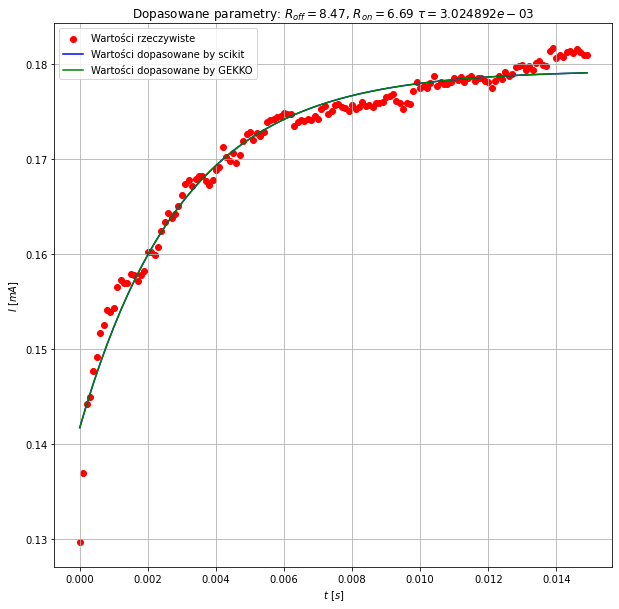

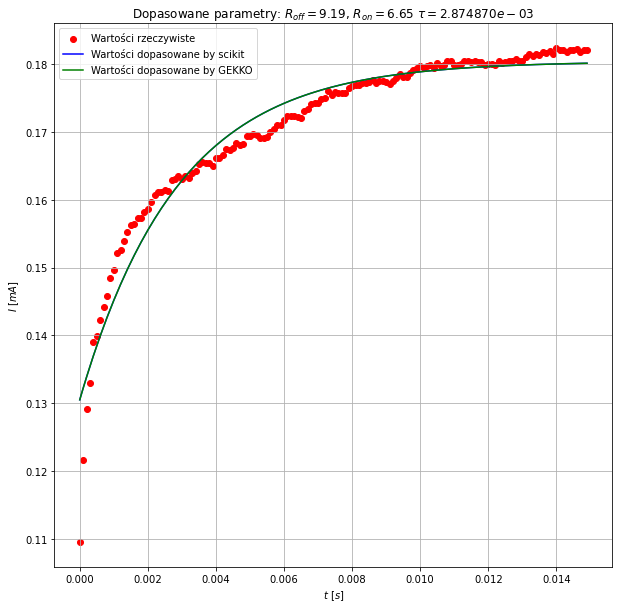

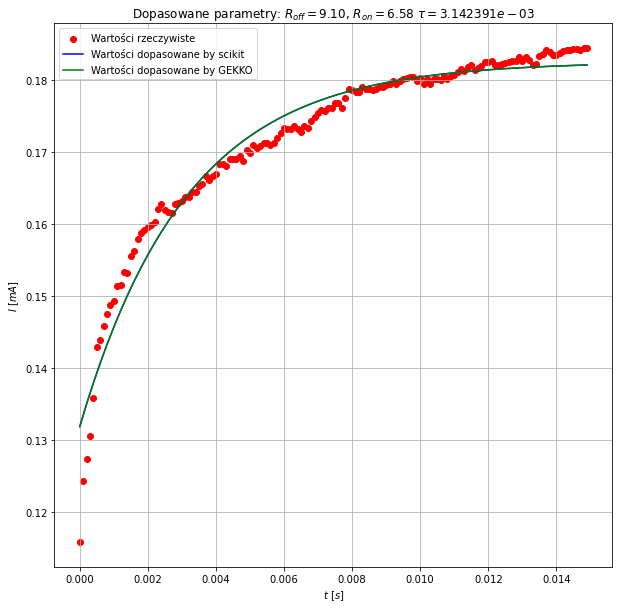

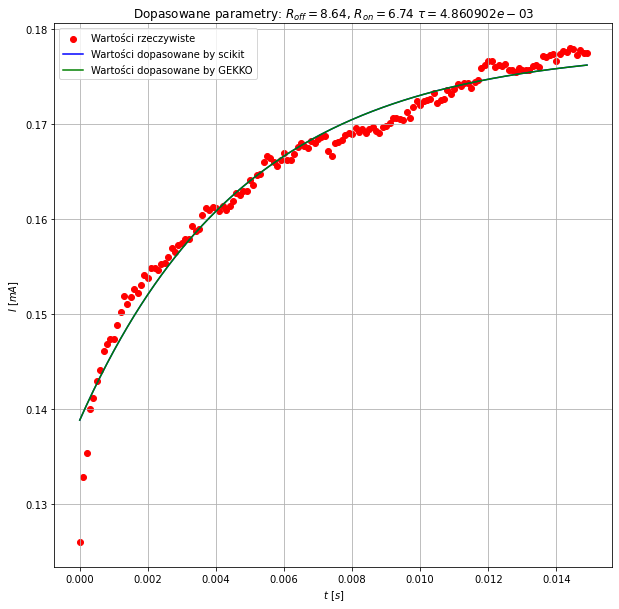

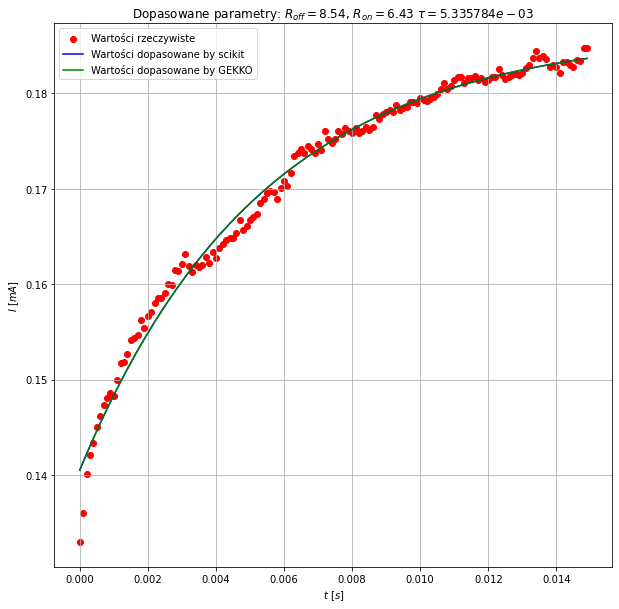

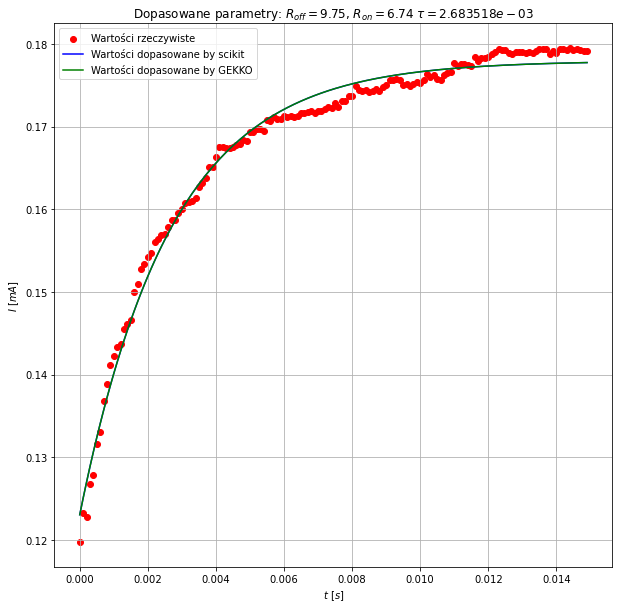

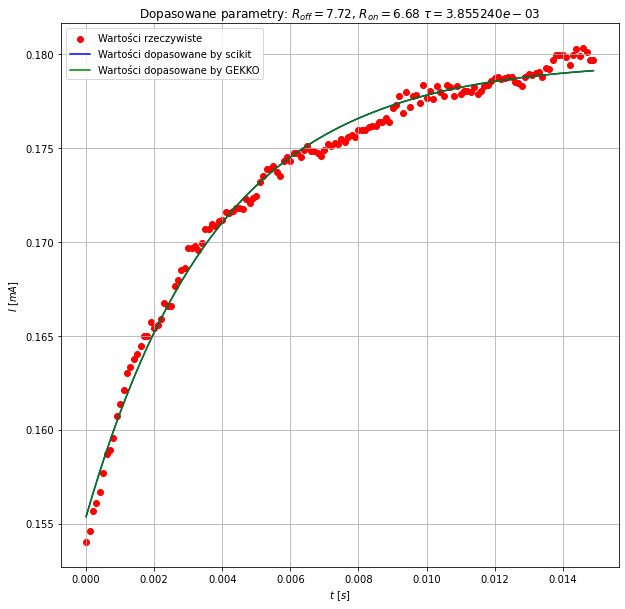

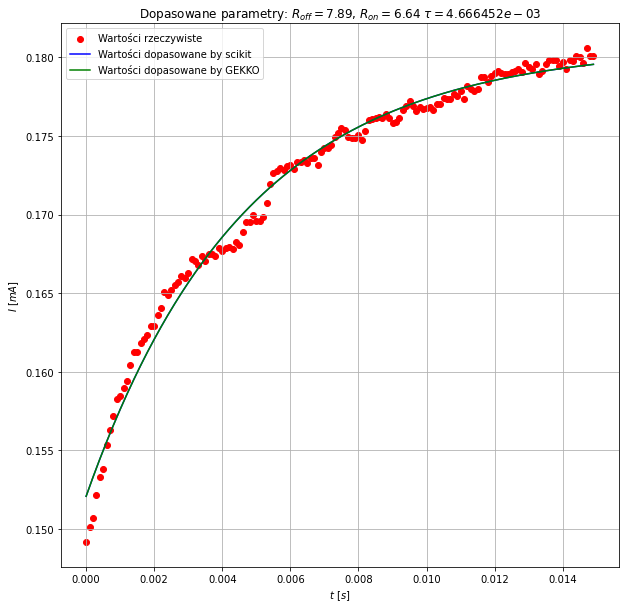

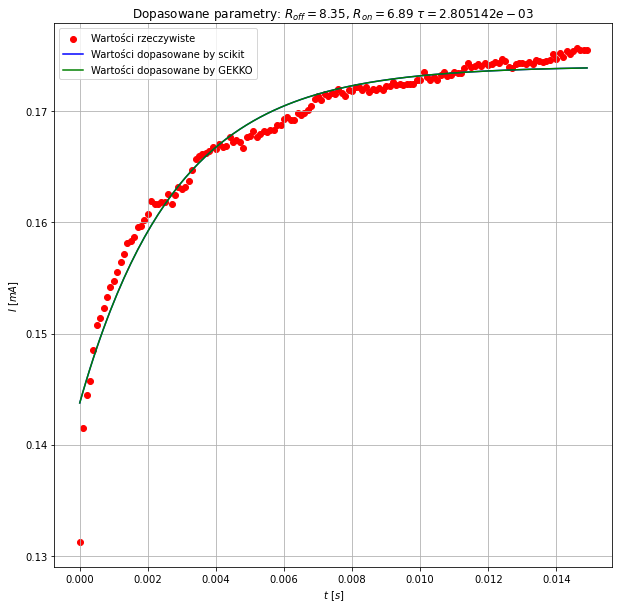

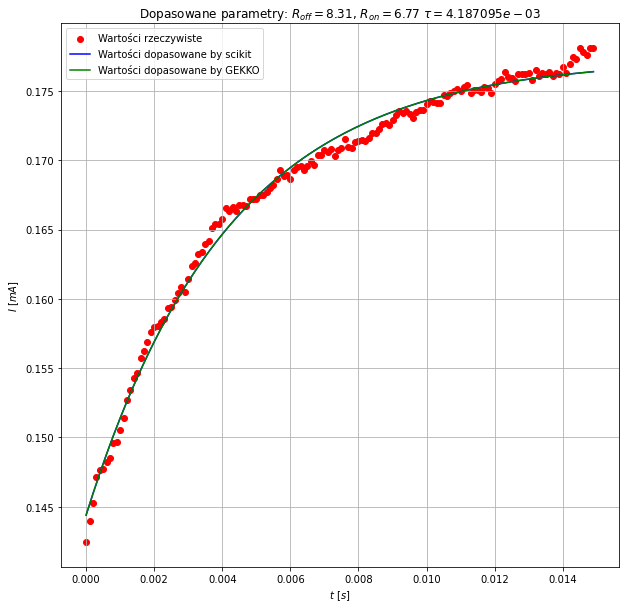

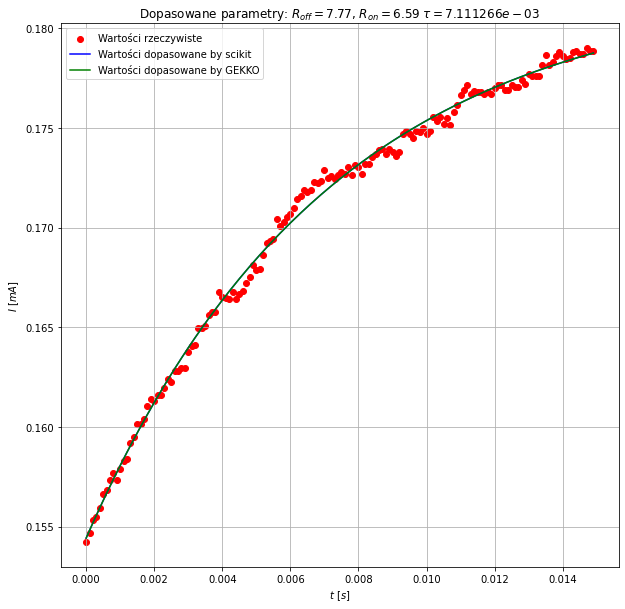

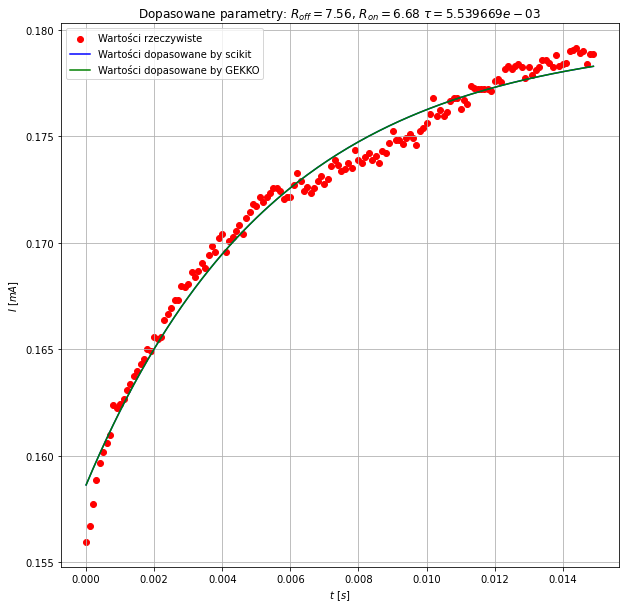

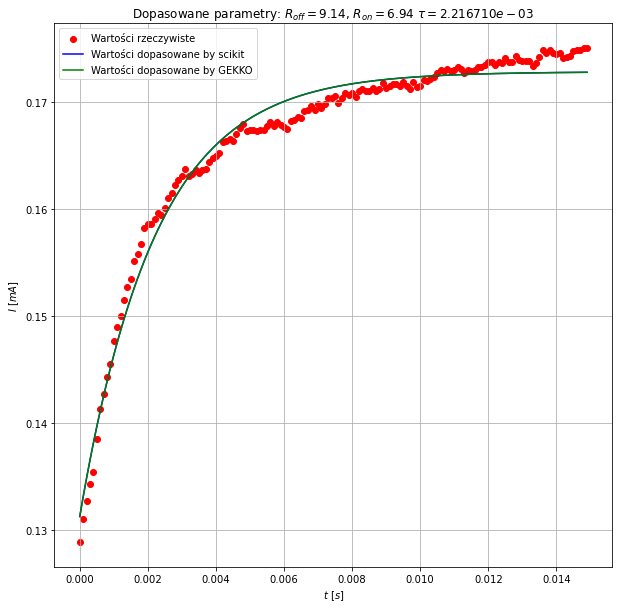

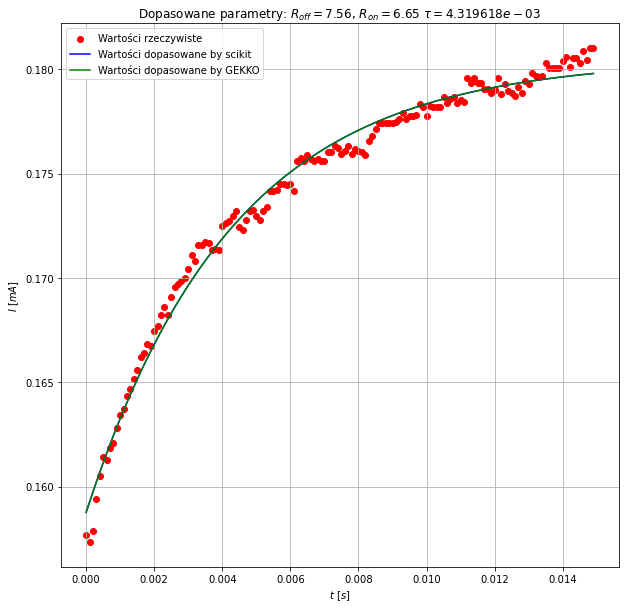

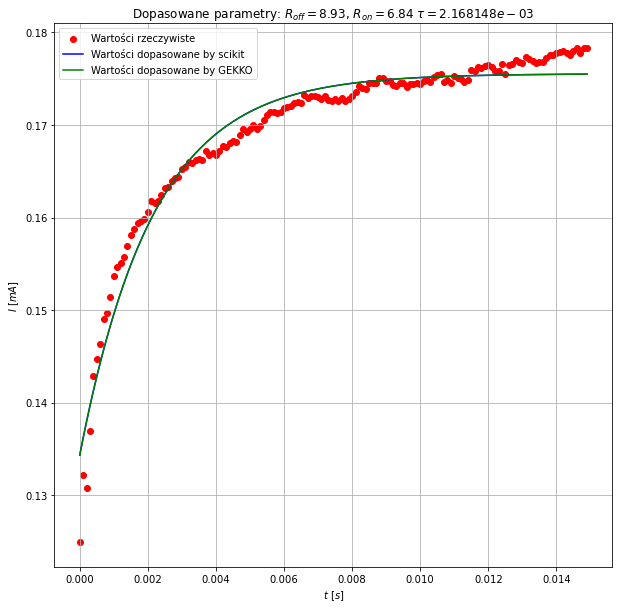

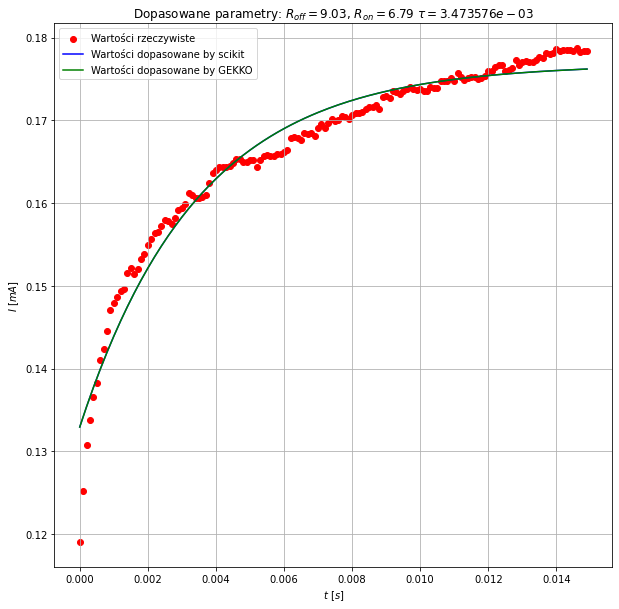

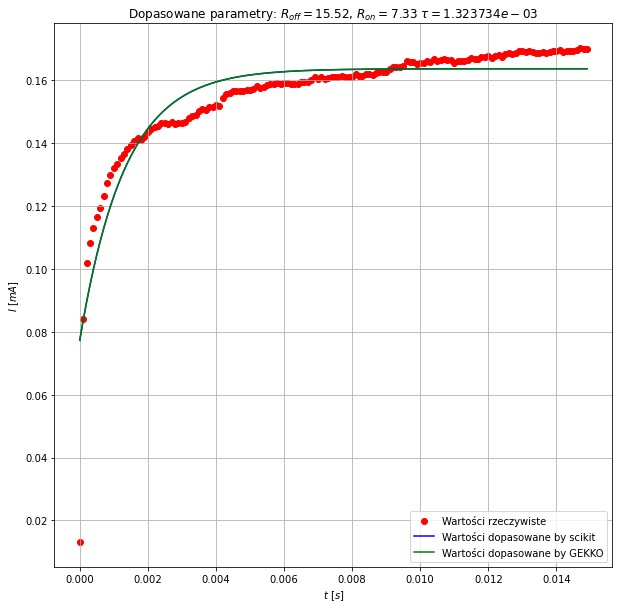

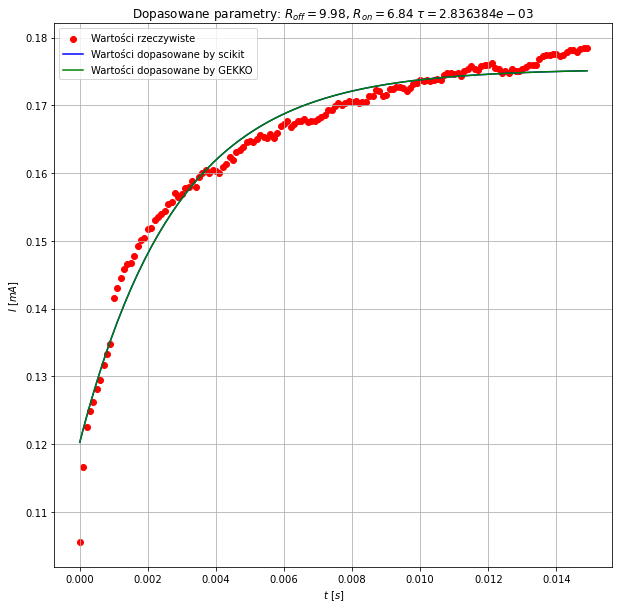

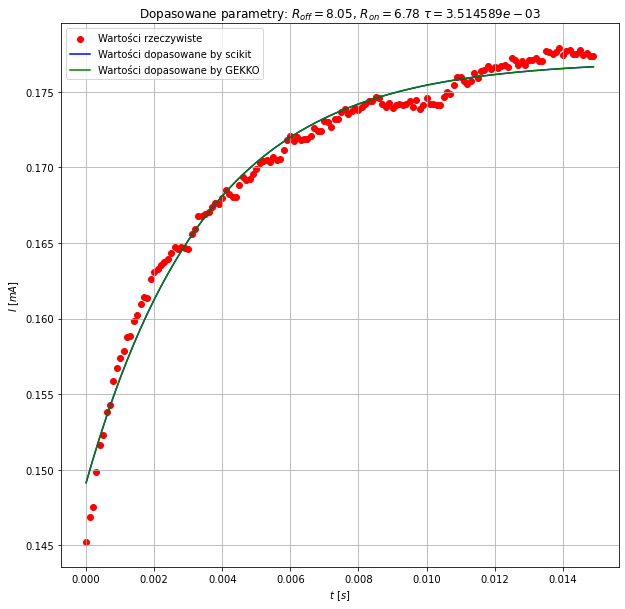

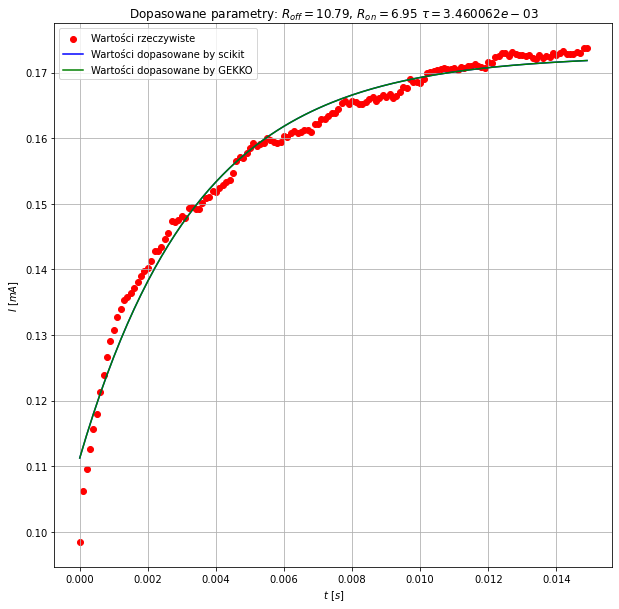

In [61]:
dir3 = './Fitted_pdfs'

from gekko import GEKKO
m = GEKKO()
example_data = datas[0]
t = m.Param(value= example_data.t.to_numpy())
R_on = m.FV(value = 12)
R_off = m.FV(value = 20)
tau = m.FV(value = 0.01)

R_on.STATUS = 1
R_off.STATUS = 1
tau.STATUS = 1

y = m.CV(value = example_data.I.to_numpy())
y.FSTATUS = 1
m.options.EV_TYPE = 2
m.Equation(y == 1.2/R_on  -  (1.2/R_on-1.2/R_off) * m.exp(-1*t/tau))
m.options.IMODE = 2
m.solve(disp=True)





if  not (os.path.exists(dir3)):
    os.makedirs(dir3)




for idx,data in enumerate(datas):
    m = GEKKO()
    I = data.I.to_numpy()
    t = data.t.to_numpy()
    x = m.Param(value= t)
    R_on = m.FV(value = 6.85)
    R_off = m.FV(value = 7.87)
    tau = m.FV(value = 0.001)
    R_on.STATUS = 1
    R_off.STATUS = 1
    tau.STATUS = 1
    y = m.CV(value = I)
    y.FSTATUS = 1
    m.options.EV_TYPE = 2
    m.Equation(y == 1.2/R_on  -  (1.2/R_on-1.2/R_off) * m.exp(-1*x/tau))
    m.options.IMODE = 2
    m.solve(disp=False)

    #t = np.insert(t,0,-1/1e4)
    #I = np.insert(I,0,0)
    popt,_= curve_fit(fit_function, t, I,method = 'trf', bounds=([0,6,0],[100,100000,0.1]))
    R_on, R_off, tau = popt
    I_scikit = fit_function(t,R_on, R_off, tau)
    plt.figure(figsize=(10,10))
    plt.scatter(t,I, c='r', label= 'Wartości rzeczywiste')
    plt.plot(t,I_scikit, c='b',label= 'Wartości dopasowane by scikit' )
    plt.plot(x.value,y.VALUE, c='g',label= 'Wartości dopasowane by GEKKO' )
    plt.xlabel('$t\ [s]$')
    plt.ylabel('$I\ [mA]$')
    plt.grid(True)
    plt.legend()
    plt.title(f'Dopasowane parametry: $R_{{off}}={R_off:.2f}$, $R_{{on}}={R_on:.2f}$ $\\tau={tau:e}$\n ')
    
    plt.savefig(f'{dir3}/{idx}.pdf',format= 'pdf')


In [58]:
from gekko import GEKKO
m = GEKKO()
example_data = datas[0]
t = m.Param(value= example_data.t.to_numpy())
R_on = m.FV(value = 12)
R_off = m.FV(value = 20)
tau = m.FV(value = 0.01)

R_on.STATUS = 1
R_off.STATUS = 1
tau.STATUS = 1

y = m.CV(value = example_data.I.to_numpy())
y.FSTATUS = 1
m.options.EV_TYPE = 2
m.Equation(y == 1.2/R_on  -  (1.2/R_on-1.2/R_off) * m.exp(-1*t/tau))
m.options.IMODE = 2
m.solve(disp=True)




apm 83.28.236.70_gk_model14 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            153
 Number of total equations: -          150
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              3
 
 **********************************************
 Model Parameter Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

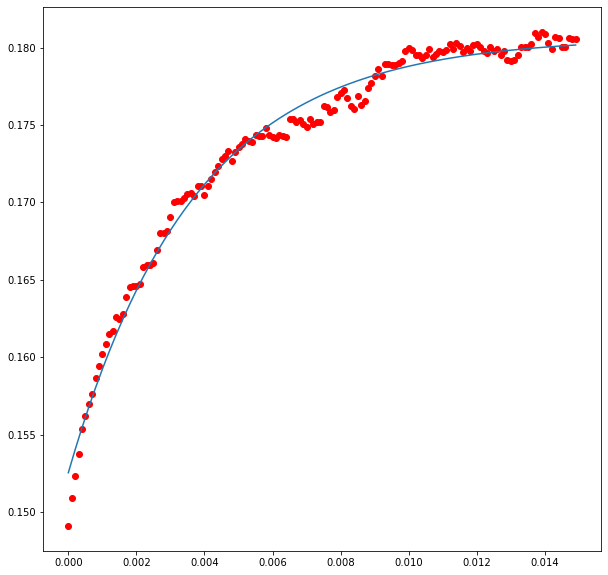

In [59]:
plt.figure(figsize=(10, 10))
plt.plot(t.value,y.value)
plt.scatter(example_data.t.to_numpy(), example_data.I.to_numpy(),c='r')
plt.show()